<a href="https://colab.research.google.com/github/DavidCrespo72/AnalisisDatos/blob/main/Taller_Final_AP_Aut_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Cargamos librerías*** 📋

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)


# ***Ejercicio 1 - Cargamos Dataset*** ✅

In [73]:
df=pd.read_excel('HISTORICO_SUERTES.xlsx')

- Revisamos el tamaño del dataset con el objetivo de iniciar la exploración de nuestros datos.

In [74]:
df.shape

(21027, 85)

- Visualizamos las primeras y las últimas filas del Dataset para conocer las variables y poder tener en cuenta los nombres y una idea del tipo de dato.

In [75]:
df.head()

Período  Hacienda             Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493          LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284    UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203      EL AMPARO SAA  IP05      31.0    007  CORINTIAS    
3   201701     81380  SAN JUDAS INCAUCA  IP05      82.0   013A         NaN   
4   201701     80298               JAVA  IP06      31.0   025A     GALPON    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   
3       1.05     66.5  CC01-1940  ...                      NaN   
4       4.53     17.0  RB73-2223  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN                   NaN                       NaN   
1                     NaN                   NaN                       NaN   
2                     NaN                   NaN                       NaN   
3                     NaN                   NaN                       NaN   
4                     NaN                   NaN                       NaN   

  Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   
3                NaN                    NaN               NaN   
4                NaN                    NaN               NaN   

   Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
0                  NaN              NaN               NaN  
1                  NaN              NaN               NaN  
2                  NaN              NaN               NaN  
3                  NaN              NaN               NaN  
4                  NaN              NaN               NaN  

[5 rows x 85 columns]

Últimas filas

In [76]:
df.tail()

Período  Hacienda       Nombre  Zona  Tenencia Suerte       Suelo  \
21022   202407     80102       LA PAZ  IP01      11.0   051B      LA PAZ   
21023   202407     80102       LA PAZ  IP01      11.0   054C      LA PAZ   
21024   202407     80102       LA PAZ  IP01      11.0   054E      LA PAZ   
21025   202407     80104      SAMARIA  IP02      11.0    165    PALMIRA    
21026   202407     80124  SANTA LUCIA  IP02      11.0    001  CORINTIAS    

       Area Neta  Dist Km  Variedad  ...  Humedad Rel Media Ciclo  \
21022       3.00      1.8  CC05-430  ...                   78.797   
21023       1.22      1.8  CC05-430  ...                   78.704   
21024       1.85      1.8  CC05-430  ...                   78.704   
21025      31.42      3.5  CC05-430  ...                   78.720   
21026       2.22      1.1  CC05-430  ...                   78.687   

      Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
21022                    16.4                31.089                       NaN   
21023                    17.8                30.945                       NaN   
21024                    17.8                30.945                       NaN   
21025                    17.8                31.040                       NaN   
21026                    17.8                30.890                       NaN   

      Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
21022            467.043                444.382             177.3   
21023            461.663                444.528             168.7   
21024            461.663                444.528             168.7   
21025            467.911                444.839             177.3   
21026            459.274                444.372             119.8   

       Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
21022               1037.8            542.2            1824.6  
21023               1041.6            536.4            1867.2  
21024               1041.6            536.4            1867.2  
21025               1037.8            544.2            1843.9  
21026               1041.6            532.5            1881.2  

[5 rows x 85 columns]

In [77]:
df_1 = df[(df["Período"] >= 202301)&(df["Período"] <= 202312)]

In [78]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3022 entries, 16573 to 19594
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    3022 non-null   int64         
 1   Hacienda                   3022 non-null   int64         
 2   Nombre                     3022 non-null   object        
 3   Zona                       3022 non-null   object        
 4   Tenencia                   3022 non-null   float64       
 5   Suerte                     3022 non-null   object        
 6   Suelo                      2596 non-null   object        
 7   Area Neta                  3022 non-null   float64       
 8   Dist Km                    3022 non-null   float64       
 9   Variedad                   3022 non-null   object        
 10  Cod.Estado #               3022 non-null   int64         
 11  Cod.Estado                 3022 non-null   object        
 12  F.Siem

- Descripción detallada de columnas del dataset

In [79]:
df_1.describe()

Período      Hacienda     Tenencia    Area Neta      Dist Km  \
count    3022.000000   3022.000000  3022.000000  3022.000000  3022.000000   
mean   202306.366314  80707.198875    42.879550     9.070829    22.667009   
min    202301.000000  80100.000000    11.000000     0.013000     1.100000   
25%    202304.000000  80167.500000    31.000000     3.552500     9.500000   
50%    202306.000000  80432.500000    51.000000     7.490000    20.000000   
75%    202309.000000  81106.750000    51.000000    12.595000    31.000000   
max    202312.000000  82552.000000    91.000000    60.630000    90.000000   
std         3.231931    686.262426    22.663202     7.126163    16.551415   

       Cod.Estado #                      F.Siembra  \
count   3022.000000                           3022   
mean       4.370615  2017-08-28 06:32:38.438120448   
min        0.000000            1994-06-25 00:00:00   
25%        2.000000            2015-09-09 00:00:00   
50%        3.000000            2018-08-19 00:00:00   
75%        6.000000            2020-04-16 18:00:00   
max       27.000000            2023-03-31 00:00:00   
std        3.807991                            NaN   

                           Ult.Riego  Edad Ult Cos  \
count                           1185   3022.000000   
mean   2023-04-06 09:56:39.493670912     12.573865   
min              2021-02-13 00:00:00      6.240000   
25%              2022-12-28 00:00:00     11.700000   
50%              2023-05-07 00:00:00     12.160000   
75%              2023-07-22 00:00:00     13.010000   
max              2023-12-29 00:00:00     33.220000   
std                              NaN      1.922507   

                         F.Ult.Corte  ...  Humedad Rel Media Ciclo  \
count                           3022  ...              1941.000000   
mean   2023-06-26 10:40:54.003970560  ...                80.897937   
min              2023-01-02 00:00:00  ...                66.292000   
25%              2023-04-05 00:00:00  ...                80.332000   
50%              2023-06-27 00:00:00  ...                81.474000   
75%              2023-09-11 00:00:00  ...                82.266000   
max              2023-12-29 00:00:00  ...                84.816000   
std                              NaN  ...                 2.701232   

       Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo  \
count              1941.000000           1941.000000   
mean                 15.630191             23.738425   
min                  12.700000             22.361000   
25%                  15.200000             22.956000   
50%                  15.500000             23.207000   
75%                  16.200000             24.275000   
max                  18.800000             28.216000   
std                   0.816212              1.132719   

       Sum Oscilacion Temp Ciclo  Radicion Solar 0-3  Radiacion Solar Ciclo  \
count                        0.0         1941.000000            1941.000000   
mean                         NaN          428.540149             437.852257   
min                          NaN          362.177000             368.704000   
25%                          NaN          415.132000             427.730000   
50%                          NaN          428.560000             439.020000   
75%                          NaN          444.515000             449.196000   
max                          NaN          479.369000             476.323000   
std                          NaN           20.570196              16.530920   

       Precipitacion 0_3  Precipitacion Ciclo  Evaporacion 0-3  \
count        1941.000000          1941.000000      1941.000000   
mean          309.574446          1209.984699       433.767852   
min            80.300000           409.400000       300.500000   
25%           239.600000          1024.200000       407.200000   
50%           309.600000          1193.000000       433.800000   
75%           383.700000          1327.300000       455.200000   
max           587.800000          3

- Revisamos Nulos.

In [80]:
df_1.isnull().sum()

Período                     0
Hacienda                    0
Nombre                      0
Zona                        0
Tenencia                    0
                         ... 
Radiacion Solar Ciclo    1081
Precipitacion 0_3        1081
Precipitacion Ciclo      1081
Evaporacion 0-3          1081
Evaporacion Ciclo        1081
Length: 85, dtype: int64

- % Part. nulos.

Hay variables en el dataset que tienen el 78,4% de datos nulos.

In [81]:
df_1.isnull().mean()*100

Período                   0.000000
Hacienda                  0.000000
Nombre                    0.000000
Zona                      0.000000
Tenencia                  0.000000
                           ...    
Radiacion Solar Ciclo    35.771013
Precipitacion 0_3        35.771013
Precipitacion Ciclo      35.771013
Evaporacion 0-3          35.771013
Evaporacion Ciclo        35.771013
Length: 85, dtype: float64

- Revisar duplicados

In [82]:
df_1.duplicated().sum()

np.int64(0)

- Vemos inicialmente nuestras variables categóricas, tenemos 14 variables categóricas.

In [83]:
# Contar cuántas columnas categóricas tiene mi DataFrame
num_cat = df_1.select_dtypes(include=['object', 'category']).shape[1]
print("Número de variables categóricas:", num_cat)

Número de variables categóricas: 14


In [84]:
#Ver mis columnas categóricas
cat_cols = df_1.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", cat_cols.tolist())

Columnas categóricas: ['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó', 'Codigo Estacion']


- Revisamos cuantas categorías únicas contienen nuestras variables categóricas.

In [85]:
df_1[cat_cols].nunique()

Nombre             482
Zona                 5
Suerte             788
Suelo               98
Variedad            36
Cod.Estado          27
D.S.                 2
Cultivo              2
Producto             3
Tipo Quema           5
T.Corte              3
Cerca de            21
Cosechó              8
Codigo Estacion     19
dtype: int64

In [86]:
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df_1[col].value_counts())


Columna: Nombre
Nombre
LA PAZ                    94
PROVIDENCIA               69
PETITE SAN FELIPE         47
LA AURORA                 46
ESPERANZA  INESA          43
                          ..
MALIBU                     1
EL TREJITO  MOL- MEJIA     1
AGUACLARA                  1
SOLEDAD SALAZAR            1
LA RAMADA                  1
Name: count, Length: 482, dtype: int64

Columna: Zona
Zona
IP05    922
IP03    733
IP06    530
IP01    497
IP02    340
Name: count, dtype: int64

Columna: Suerte
Suerte
001     272
002     192
003     167
004     128
005     110
       ... 
501       1
363       1
362       1
362B      1
507A      1
Name: count, Length: 788, dtype: int64

Columna: Suelo
Suelo
CORINTIAS              632
GALPON                 325
PALMIRA                257
MANUELITA               91
NUEVO PICHICHI          78
                      ... 
PICHINDE                 1
PORCE BLUM-PALMERAS      1
Desbaratado              1
BRITANIA-CHUNDULAR       1
REFUGIO                  

- Al revisar la información de las columnas categóricas, vamos a descartar de entrada las variables "Nombre", "Suelo","Suerte","Variedad","Cod Estado","Producto","Cerca de","Cosechó","Codigo Estacion" dado que tienen más de 10 categorías.

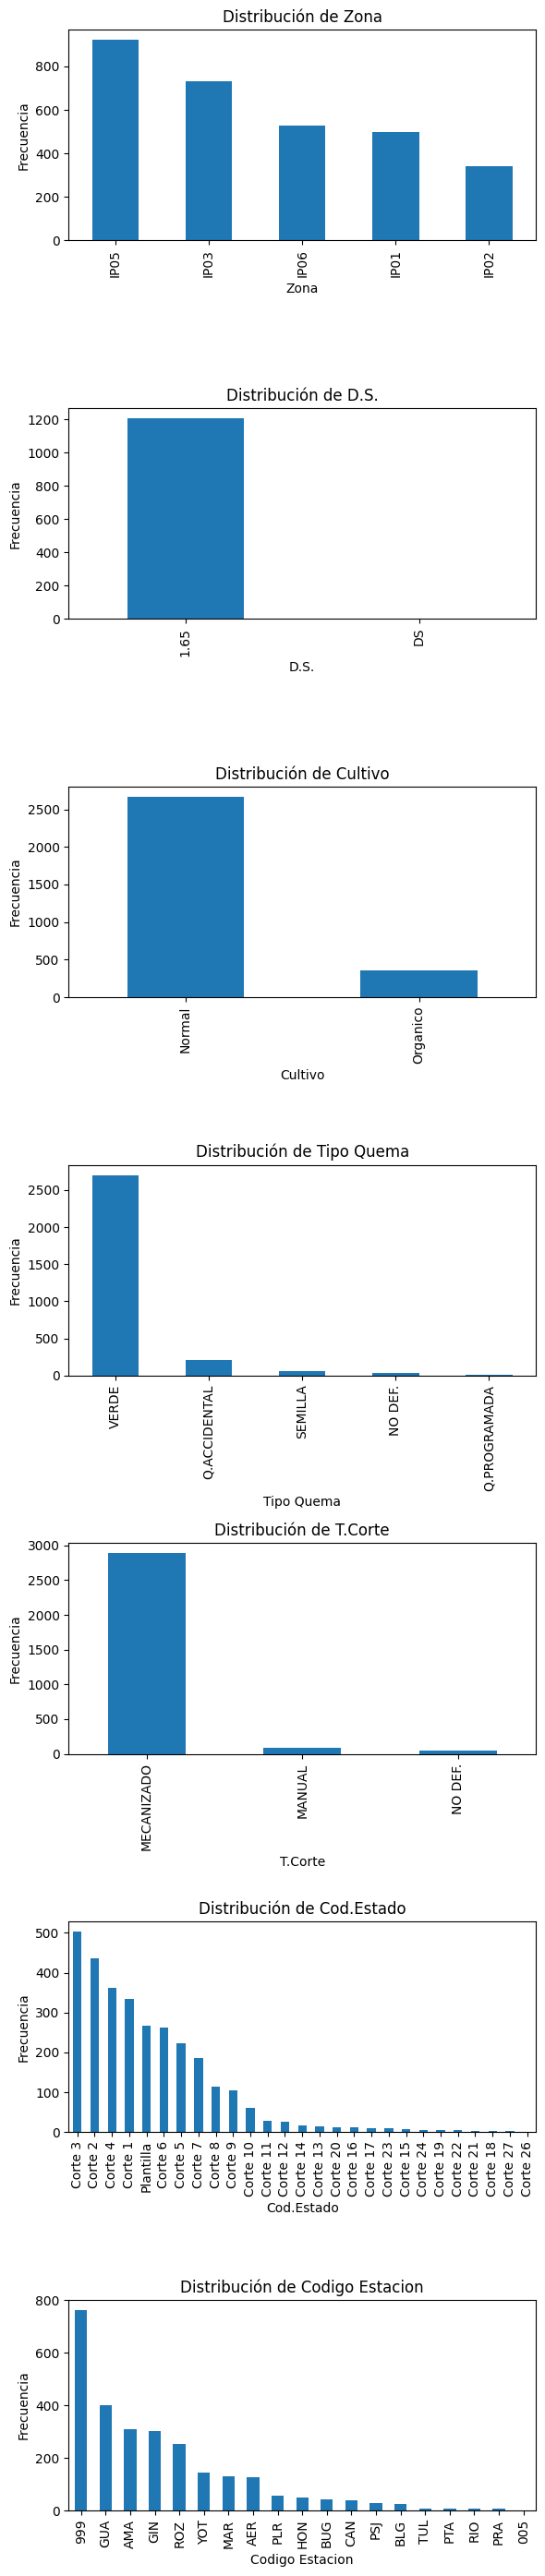

In [87]:
import matplotlib.pyplot as plt

cols_a_graficar = ['Zona', 'D.S.', 'Cultivo','Tipo Quema','T.Corte','Cod.Estado','Codigo Estacion']

# Crear subplots dinámicamente según el número de columnas seleccionadas
fig, axes = plt.subplots(nrows=len(cols_a_graficar), figsize=(6, 4*len(cols_a_graficar)))

# Si hay solo una columna, axes no es iterable
if len(cols_a_graficar) == 1:
    axes = [axes]

# Graficar cada columna seleccionada
for col, ax in zip(cols_a_graficar, axes):
    df_1[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

- Sacamos una base solo con las categóricas. Vamos a analizarlas a parte con diferentes técnicas para encontrar algún tipo de relación con la variable Objetivo TCH.

Descartamos "Cultivo" y "D.S," dado que estas variables tienen solo dos categorías y la mayor parte de los registros están concentrados en una de las dos.

## ***Análisis para predicción de TCH*** ⚡

***MODELO DE REGRESIÓN - TCH*** 📋

***Cargamos las librerías*** 📋

In [88]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt
from sklearn.preprocessing import StandardScaler

***Cargamos y exploramos el Dataset*** 📋

In [89]:
df = pd.read_excel('HISTORICO_SUERTES.xlsx')

In [90]:
df.shape

(21027, 85)

In [91]:
df.head()

Período  Hacienda             Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493          LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284    UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203      EL AMPARO SAA  IP05      31.0    007  CORINTIAS    
3   201701     81380  SAN JUDAS INCAUCA  IP05      82.0   013A         NaN   
4   201701     80298               JAVA  IP06      31.0   025A     GALPON    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   
3       1.05     66.5  CC01-1940  ...                      NaN   
4       4.53     17.0  RB73-2223  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN                   NaN                       NaN   
1                     NaN                   NaN                       NaN   
2                     NaN                   NaN                       NaN   
3                     NaN                   NaN                       NaN   
4                     NaN                   NaN                       NaN   

  Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   
3                NaN                    NaN               NaN   
4                NaN                    NaN               NaN   

   Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
0                  NaN              NaN               NaN  
1                  NaN              NaN               NaN  
2                  NaN              NaN               NaN  
3                  NaN              NaN               NaN  
4                  NaN              NaN               NaN  

[5 rows x 85 columns]

In [92]:
df.tail()

Período  Hacienda       Nombre  Zona  Tenencia Suerte       Suelo  \
21022   202407     80102       LA PAZ  IP01      11.0   051B      LA PAZ   
21023   202407     80102       LA PAZ  IP01      11.0   054C      LA PAZ   
21024   202407     80102       LA PAZ  IP01      11.0   054E      LA PAZ   
21025   202407     80104      SAMARIA  IP02      11.0    165    PALMIRA    
21026   202407     80124  SANTA LUCIA  IP02      11.0    001  CORINTIAS    

       Area Neta  Dist Km  Variedad  ...  Humedad Rel Media Ciclo  \
21022       3.00      1.8  CC05-430  ...                   78.797   
21023       1.22      1.8  CC05-430  ...                   78.704   
21024       1.85      1.8  CC05-430  ...                   78.704   
21025      31.42      3.5  CC05-430  ...                   78.720   
21026       2.22      1.1  CC05-430  ...                   78.687   

      Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
21022                    16.4                31.089                       NaN   
21023                    17.8                30.945                       NaN   
21024                    17.8                30.945                       NaN   
21025                    17.8                31.040                       NaN   
21026                    17.8                30.890                       NaN   

      Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
21022            467.043                444.382             177.3   
21023            461.663                444.528             168.7   
21024            461.663                444.528             168.7   
21025            467.911                444.839             177.3   
21026            459.274                444.372             119.8   

       Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
21022               1037.8            542.2            1824.6  
21023               1041.6            536.4            1867.2  
21024               1041.6            536.4            1867.2  
21025               1037.8            544.2            1843.9  
21026               1041.6            532.5            1881.2  

[5 rows x 85 columns]

In [93]:
df_correlacion = df.corr(numeric_only=True)['TCH'].sort_values(ascending=False)
print(df_correlacion)

TCH                          1.000000
TAH                          0.866165
TCHM                         0.829980
KATRHM                       0.767925
TAHM                         0.737953
                               ...   
%ATR                        -0.138399
%Sac.Caña                   -0.168060
Cod.Estado #                -0.225865
Fert.Nitrogen.                    NaN
Sum Oscilacion Temp Ciclo         NaN
Name: TCH, Length: 67, dtype: float64


In [94]:
print(df_correlacion.head(20))

TCH                      1.000000
TAH                      0.866165
TCHM                     0.829980
KATRHM                   0.767925
TAHM                     0.737953
TonUltCorte              0.320696
Edad Ult Cos             0.298166
Ton.Azucar               0.295671
Evaporacion Ciclo        0.260934
Evaporacion 0-3          0.185401
Edad.Precosecha          0.168624
Radicion Solar 0-3       0.164893
Luvias 9 -FC             0.156767
Radiacion Solar Ciclo    0.113209
%Infest.Diatrea          0.102551
DDUlt.Riego              0.093181
Area Neta                0.093021
M3 Riego                 0.084436
Lluvias Ciclo            0.084137
MEZ                      0.078172
Name: TCH, dtype: float64


In [95]:
print(df_correlacion.tail(20))

%Fibra Caña                 -0.042250
Oscilacion Temp Ciclo       -0.043355
Temp. Media Ciclo           -0.043355
Dist Km                     -0.048510
Rdto                        -0.051656
Hacienda                    -0.051714
Humedad Rel Media 0-3       -0.060637
Brix                        -0.070244
%ME Min                     -0.079372
NITRAX-S                    -0.081815
Precipitacion 0_3           -0.085304
Temp Min Ciclo              -0.095655
Vejez                       -0.106200
Destino 1=Semilla           -0.119599
Período                     -0.122134
%ATR                        -0.138399
%Sac.Caña                   -0.168060
Cod.Estado #                -0.225865
Fert.Nitrogen.                    NaN
Sum Oscilacion Temp Ciclo         NaN
Name: TCH, dtype: float64


***Filtramos el DataFrame para incluir sólo los datos a partir del año 2023, para que el modelo de predicción se base en la información más actualizada posible.*** 📋

In [96]:
(df["Período"].astype(int)//100).value_counts().sort_index()

Período
2017    2517
2018    2879
2019    2852
2020    2889
2021    2504
2022    2932
2023    3022
2024    1432
Name: count, dtype: int64

In [97]:
df_filtrado = df[(df["Período"] >= 202301)&(df["Período"] <= 202407)]
df_filtrado.shape

(4454, 85)

In [98]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 16573 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    4454 non-null   int64         
 1   Hacienda                   4454 non-null   int64         
 2   Nombre                     4454 non-null   object        
 3   Zona                       4454 non-null   object        
 4   Tenencia                   4454 non-null   float64       
 5   Suerte                     4454 non-null   object        
 6   Suelo                      3832 non-null   object        
 7   Area Neta                  4454 non-null   float64       
 8   Dist Km                    4454 non-null   float64       
 9   Variedad                   4454 non-null   object        
 10  Cod.Estado #               4454 non-null   int64         
 11  Cod.Estado                 4454 non-null   object        
 12  F.Siem

In [99]:
df_filtrado.describe()

Período      Hacienda     Tenencia    Area Neta      Dist Km  \
count    4454.000000   4454.000000  4454.000000  4454.000000  4454.000000   
mean   202337.578806  80722.270094    42.500225     9.185664    22.250427   
min    202301.000000  80100.000000    11.000000     0.007000     1.100000   
25%    202305.000000  80167.000000    31.000000     3.730000     9.525000   
50%    202309.000000  80438.000000    51.000000     7.670000    19.650000   
75%    202402.000000  81113.750000    51.000000    12.650000    30.500000   
max    202407.000000  82557.000000    91.000000    65.000000    90.000000   
std        45.437163    698.078671    22.470719     7.167798    16.150947   

       Cod.Estado #                      F.Siembra  \
count   4454.000000                           4454   
mean       4.360799  2017-12-07 22:56:37.934440704   
min        0.000000            1994-06-25 00:00:00   
25%        2.000000            2016-01-25 00:00:00   
50%        3.000000            2018-10-20 00:00:00   
75%        6.000000            2020-07-09 00:00:00   
max       28.000000            2023-09-08 00:00:00   
std        3.845640                            NaN   

                           Ult.Riego  Edad Ult Cos  \
count                           1777   4454.000000   
mean   2023-07-14 04:16:52.943162880     12.450813   
min              2021-02-13 00:00:00      6.210000   
25%              2023-02-18 00:00:00     11.700000   
50%              2023-07-22 00:00:00     12.160000   
75%              2023-12-17 00:00:00     12.910000   
max              2024-06-27 00:00:00     33.220000   
std                              NaN      1.762564   

                      F.Ult.Corte  ...  Humedad Rel Media Ciclo  \
count                        4454  ...              2882.000000   
mean   2023-09-23 15:46:18.805568  ...                80.196879   
min           2023-01-02 00:00:00  ...                63.327000   
25%           2023-05-19 00:00:00  ...                79.392750   
50%           2023-09-07 00:00:00  ...                80.889000   
75%           2024-02-05 18:00:00  ...                81.938000   
max           2024-07-10 00:00:00  ...                84.816000   
std                           NaN  ...                 2.988335   

       Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo  \
count              2882.000000           2882.000000   
mean                 16.050173             25.432274   
min                  12.700000             22.361000   
25%                  15.400000             23.076250   
50%                  15.700000             24.187000   
75%                  16.700000             27.826500   
max                  19.700000             32.358000   
std                   1.258044              2.731625   

       Sum Oscilacion Temp Ciclo  Radicion Solar 0-3  Radiacion Solar Ciclo  \
count                        0.0         2882.000000            2882.000000   
mean                         NaN          434.459014             443.851198   
min                          NaN          362.177000             368.704000   
25%                          NaN          419.569750             432.890750   
50%                          NaN          436.962000             446.445000   
75%                          NaN          449.542750             457.406750   
max                          NaN          500.212000             485.672000   
std                          NaN           22.132714              18.726191   

       Precipitacion 0_3  Precipitacion Ciclo  Evaporacion 0-3  \
count        2882.000000          2882.000000       2882.00000   
mean          286.536155          1114.137578        443.01721   
min            23.100000            23.100000        190.40000   
25%           214.300000           895.400000        417.92500   
50%           287.200000          1104.600000        442.15000   
75%           354.700000          1264.400000        466.20000   
max           587.800000          3783.700000        614.30000

***Definimos la variable objetivo (TCH)*** 📋

In [100]:
target = 'TCH'

***Seleccionamos las variables numéricas que consideramos que aportan a la predicción de la variable objetivo (TCH)*** 📋

In [101]:
numericas = ['TonUltCorte', 'Lluvias Ciclo', 'Edad Ult Cos', 'Temp. Media Ciclo', 'Humedad Rel Media Ciclo']

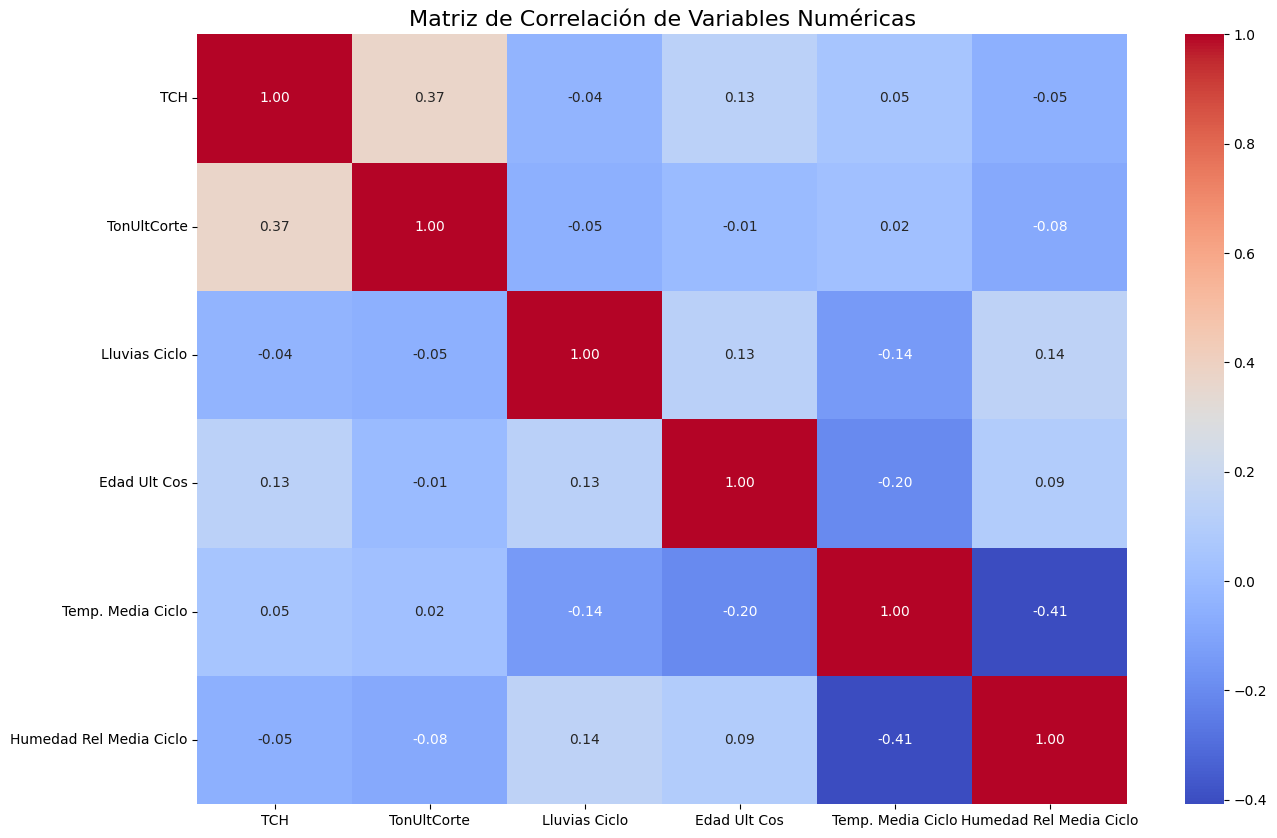

In [102]:
plt.figure(figsize=(15, 10))
df_filtrado_correlacion = df_filtrado[['TCH'] + numericas]
correlation_matrix = df_filtrado_correlacion.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

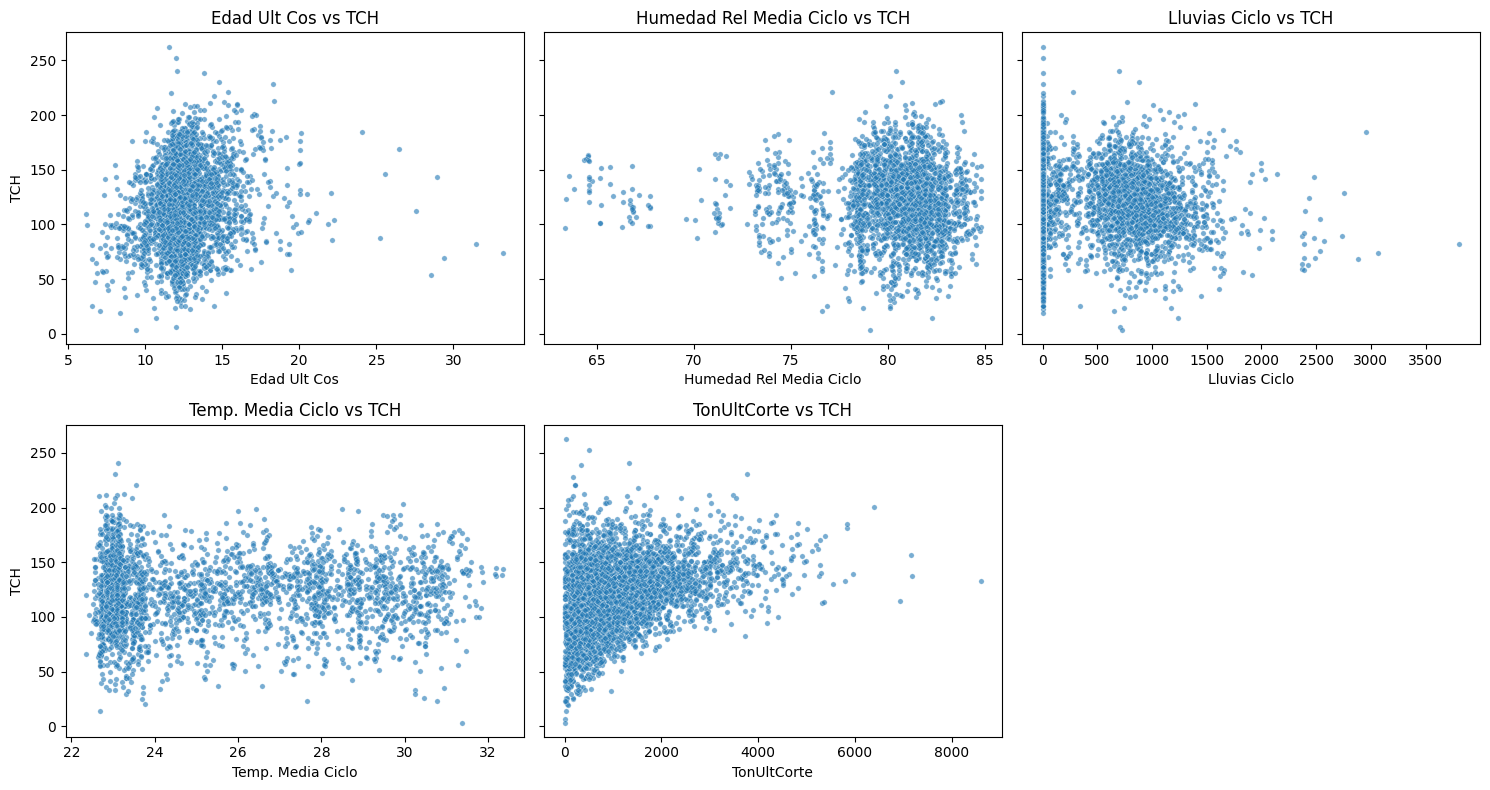

In [103]:
y = "TCH"

df_filtrado2 = df_filtrado[numericas + ['TCH']].copy()

x_cols = df_filtrado2.select_dtypes(include="number").columns.difference([y])

n = len(x_cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df_filtrado2, x=col, y=y, ax=axes[i], s=15, alpha=0.6)
    axes[i].set_title(f"{col} vs {y}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [104]:
df_filtrado[numericas].head()

TonUltCorte  Lluvias Ciclo  Edad Ult Cos  Temp. Media Ciclo  \
16573      260.590            0.0          9.69             22.896   
16574     1290.740          558.0         14.62             22.963   
16575      380.650          154.0         11.56                NaN   
16576      220.180          858.0         11.66                NaN   
16577      923.925         1295.0         12.68             22.519   

       Humedad Rel Media Ciclo  
16573                   82.324  
16574                   81.899  
16575                      NaN  
16576                      NaN  
16577                   83.230

In [105]:
df_filtrado[numericas].describe()

TonUltCorte  Lluvias Ciclo  Edad Ult Cos  Temp. Media Ciclo  \
count  4454.000000    4454.000000   4454.000000        2882.000000   
mean   1127.182853     402.079863     12.450813          25.432274   
std     977.912110     500.144528      1.762564           2.731625   
min       0.650000       0.000000      6.210000          22.361000   
25%     405.901250       0.000000     11.700000          23.076250   
50%     865.190000      17.000000     12.160000          24.187000   
75%    1559.910000     799.000000     12.910000          27.826500   
max    8610.070000    3807.000000     33.220000          32.358000   

       Humedad Rel Media Ciclo  
count              2882.000000  
mean                 80.196879  
std                   2.988335  
min                  63.327000  
25%                  79.392750  
50%                  80.889000  
75%                  81.938000  
max                  84.816000

In [106]:
df_filtrado[numericas].isnull().sum()

TonUltCorte                   0
Lluvias Ciclo                 0
Edad Ult Cos                  0
Temp. Media Ciclo          1572
Humedad Rel Media Ciclo    1572
dtype: int64

In [107]:
df_filtrado[numericas].isnull().mean()*100

TonUltCorte                 0.000000
Lluvias Ciclo               0.000000
Edad Ult Cos                0.000000
Temp. Media Ciclo          35.294118
Humedad Rel Media Ciclo    35.294118
dtype: float64

***Imputamos por la mediana los valores faltantes de las variables numéricas*** 📋

In [108]:
cols = ["Temp. Media Ciclo", "Humedad Rel Media Ciclo"]
df_filtrado[cols] = df_filtrado[cols].apply(pd.to_numeric, errors="coerce")
medianas = df_filtrado[cols].median()
df_filtrado[cols] = df_filtrado[cols].fillna(medianas)
print(df_filtrado[cols].isnull().sum())

Temp. Media Ciclo          0
Humedad Rel Media Ciclo    0
dtype: int64


/tmp/ipython-input-1869535980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[cols] = df_filtrado[cols].apply(pd.to_numeric, errors="coerce")
/tmp/ipython-input-1869535980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[cols] = df_filtrado[cols].fillna(medianas)


In [109]:
df_filtrado[numericas].isnull().sum()

TonUltCorte                0
Lluvias Ciclo              0
Edad Ult Cos               0
Temp. Media Ciclo          0
Humedad Rel Media Ciclo    0
dtype: int64

In [110]:
df_filtrado[numericas].describe()

TonUltCorte  Lluvias Ciclo  Edad Ult Cos  Temp. Media Ciclo  \
count  4454.000000    4454.000000   4454.000000        4454.000000   
mean   1127.182853     402.079863     12.450813          24.992766   
std     977.912110     500.144528      1.762564           2.276365   
min       0.650000       0.000000      6.210000          22.361000   
25%     405.901250       0.000000     11.700000          23.393500   
50%     865.190000      17.000000     12.160000          24.187000   
75%    1559.910000     799.000000     12.910000          25.719000   
max    8610.070000    3807.000000     33.220000          32.358000   

       Humedad Rel Media Ciclo  
count              4454.000000  
mean                 80.441157  
std                   2.426323  
min                  63.327000  
25%                  80.236500  
50%                  80.889000  
75%                  81.337500  
max                  84.816000

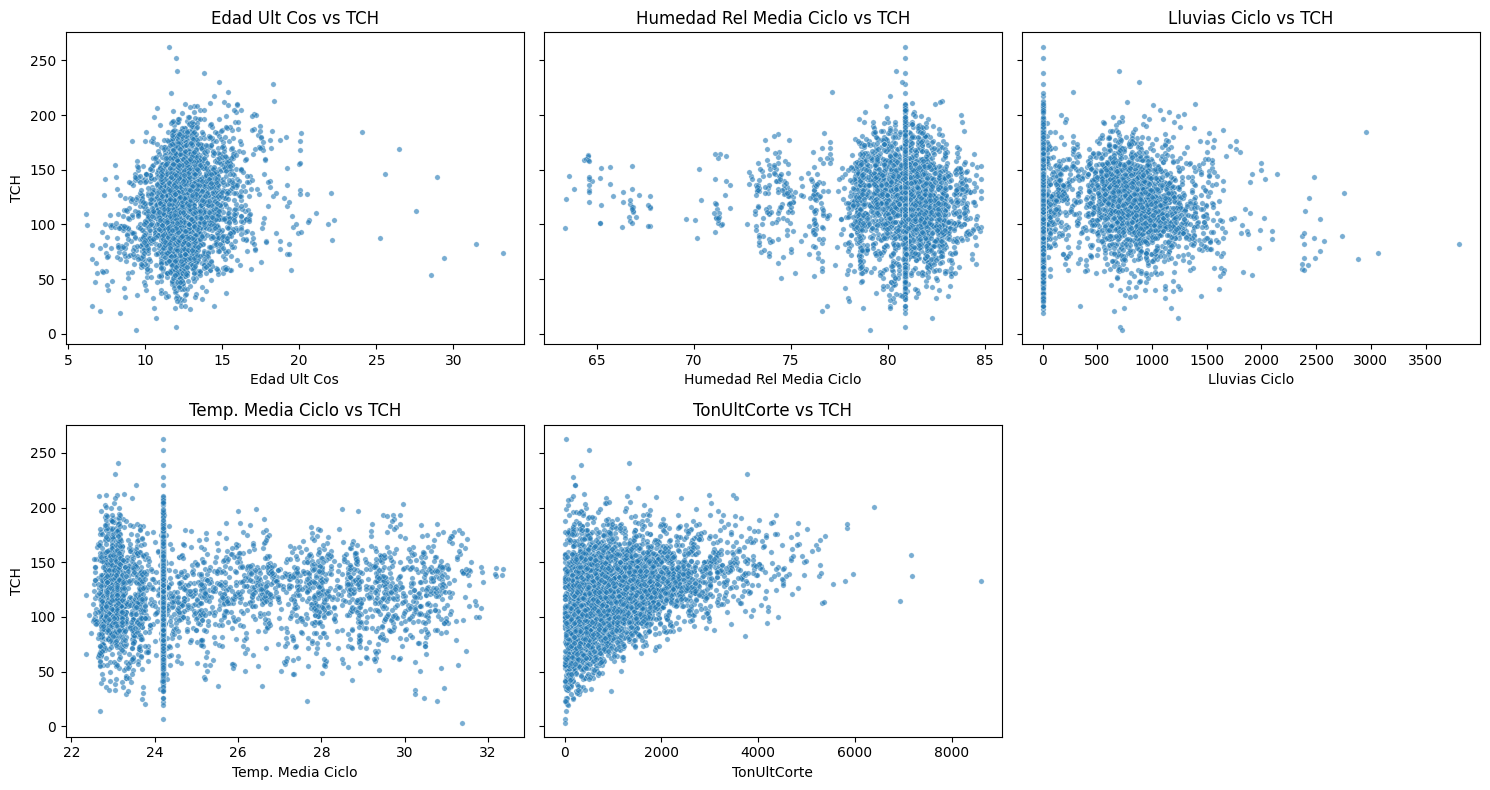

In [111]:
y = "TCH"

df_filtrado2 = df_filtrado[numericas + ['TCH']].copy()

x_cols = df_filtrado2.select_dtypes(include="number").columns.difference([y])

n = len(x_cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), sharey=True)
axes = axes.flatten()

for i, col in enumerate(x_cols):
    sns.scatterplot(data=df_filtrado2, x=col, y=y, ax=axes[i], s=15, alpha=0.6)
    axes[i].set_title(f"{col} vs {y}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

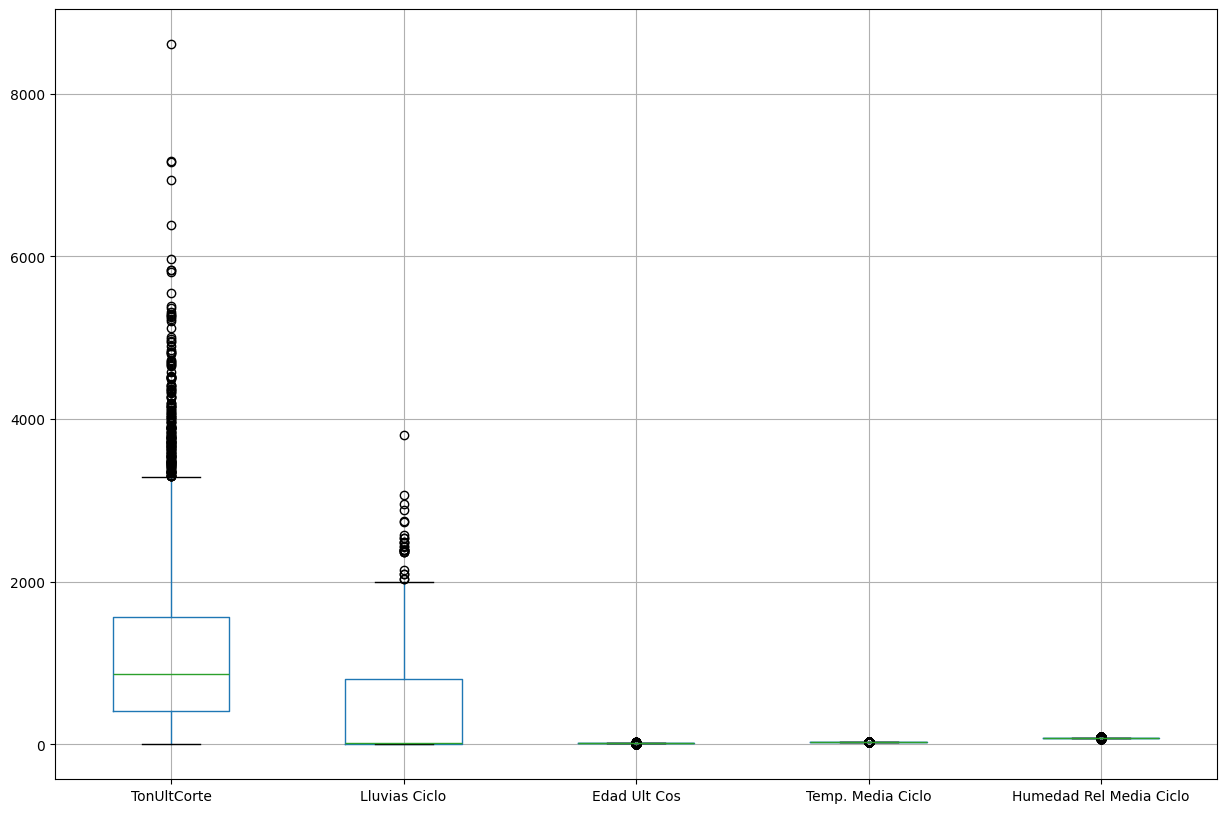

In [112]:
df_filtrado[numericas].boxplot(figsize=(15,10))

***Seleccionamos las variables categóricas que consideramos que aportan a la predicción de la variable objetivo (TCH)*** 📋

In [113]:
def correlation_ratio(categories, measurements):
    cats, _ = pd.factorize(categories)
    mean_total = np.mean(measurements)
    ss_between = sum([
        len(measurements[cats == c]) * (np.mean(measurements[cats == c]) - mean_total) ** 2
        for c in np.unique(cats)])
    ss_total = sum((measurements - mean_total) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0

target = "TCH"

cat_cols = df_filtrado.select_dtypes(include=["object", "category"]).columns.tolist()

eta_results = {}
for col in cat_cols:
    eta_results[col] = correlation_ratio(df[col], df[target])

eta_df = pd.DataFrame.from_dict(eta_results, orient="index", columns=["eta"])
eta_df = eta_df.sort_values(by="eta", ascending=False)

print(eta_df)

                      eta
Nombre           0.544043
Suerte           0.334035
Cod.Estado       0.297176
Variedad         0.291610
Suelo            0.279061
Cerca de         0.181214
Zona             0.179006
Codigo Estacion  0.174977
Tipo Quema       0.170770
Producto         0.122145
Cosechó          0.107156
T.Corte          0.089536
D.S.             0.026729
Cultivo          0.005952


In [114]:
categoricas = ['Nombre', 'Variedad', 'Tipo Quema']
df_filtrado[categoricas].head()

Nombre   Variedad    Tipo Quema
16573   LA JULIA SAAVEDRA    CC84-75  Q.ACCIDENTAL
16574           EL TESORO    CC85-92         VERDE
16575           EL TESORO  CC01-1940         VERDE
16576          LA ARGELIA  CC01-1940         VERDE
16577  SAN PABLO AZCARATE  CC01-1940         VERDE

In [115]:
df_filtrado[categoricas].nunique()

Nombre        521
Variedad       38
Tipo Quema      5
dtype: int64

In [116]:
df_filtrado[categoricas].isnull().sum()

Nombre        0
Variedad      0
Tipo Quema    0
dtype: int64

In [117]:
df_filtrado[categoricas].isnull().mean()*100

Nombre        0.0
Variedad      0.0
Tipo Quema    0.0
dtype: float64

In [118]:
for col in categoricas:
    print(f"\nColumna: {col}")
    print(df_filtrado[col].value_counts())


Columna: Nombre
Nombre
LA PAZ                 137
PROVIDENCIA             96
MARSELLA                76
PETITE SAN FELIPE       76
ESPERANZA  INESA        68
                      ... 
EL TREBOL HOLGUIN        1
LAS CEIBAS ROMA          1
JOSEPILLA MANUELITA      1
POTOSI MANUELITA         1
MILAN JOSE IGNACIO       1
Name: count, Length: 521, dtype: int64

Columna: Variedad
Variedad
CC01-1940    1864
CC05-430     1270
CC85-92       335
CC09-535      142
CC09-066      113
VARIAS         92
RB73-2223      83
CC93-4418      83
CC11-600       78
CC04-195       59
CC97-7170      52
CC12-2120      38
CC01-1228      34
CC98-72        24
V71-51         23
CC01-678       20
CC00-3257      19
PR61-632       17
CC93-4181      16
CC84-75        13
CC15-2356      13
CC09-702        9
CC11-595        9
CC09-235        7
CC91-1606       7
CC05-230        5
CC11-2132       5
CC09-449        5
CC00-3771       3
CC05-231        3
CC15-2495       3
RD75-11         3
CC82-15         2
CC01-746        1


***Unimos las variables objetivo, numéricas y categóricas en una lista*** 📋

In [119]:
variables = [target] + numericas + categoricas
df_filtrado[variables].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 16573 to 21026
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TCH                      4454 non-null   float64
 1   TonUltCorte              4454 non-null   float64
 2   Lluvias Ciclo            4454 non-null   float64
 3   Edad Ult Cos             4454 non-null   float64
 4   Temp. Media Ciclo        4454 non-null   float64
 5   Humedad Rel Media Ciclo  4454 non-null   float64
 6   Nombre                   4454 non-null   object 
 7   Variedad                 4454 non-null   object 
 8   Tipo Quema               4454 non-null   object 
dtypes: float64(6), object(3)
memory usage: 348.0+ KB


***Revisamos duplicados*** 📋

In [120]:
df_filtrado[variables].duplicated().sum()

np.int64(0)

***Unimos las variables numéricas y categóricas en una lista*** 📋

In [121]:
predictoras = numericas + categoricas
df_filtrado[predictoras].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 16573 to 21026
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TonUltCorte              4454 non-null   float64
 1   Lluvias Ciclo            4454 non-null   float64
 2   Edad Ult Cos             4454 non-null   float64
 3   Temp. Media Ciclo        4454 non-null   float64
 4   Humedad Rel Media Ciclo  4454 non-null   float64
 5   Nombre                   4454 non-null   object 
 6   Variedad                 4454 non-null   object 
 7   Tipo Quema               4454 non-null   object 
dtypes: float64(5), object(3)
memory usage: 313.2+ KB


***Estandarizamos las variables numéricas*** 📋

In [122]:
from sklearn.preprocessing import StandardScaler

vars = df_filtrado[variables].columns
numericVars = df_filtrado[variables].select_dtypes(include='number')
categoricalVars = df_filtrado[variables].select_dtypes(include='object')
numericVars[numericVars.columns] = StandardScaler().fit_transform(numericVars)
df_filtrado_Std = pd.concat([numericVars,categoricalVars], axis=1)
df_filtrado_Std.describe()

TCH   TonUltCorte  Lluvias Ciclo  Edad Ult Cos  \
count  4.454000e+03  4.454000e+03    4454.000000  4.454000e+03   
mean   2.999148e-16  2.233408e-17       0.000000  5.104932e-16   
std    1.000112e+00  1.000112e+00       1.000112  1.000112e+00   
min   -3.622485e+00 -1.152107e+00      -0.804018 -3.541155e+00   
25%   -6.452528e-01 -7.376558e-01      -0.804018 -4.260253e-01   
50%    3.779910e-02 -2.679405e-01      -0.770024 -1.650127e-01   
75%    6.605773e-01  4.425507e-01       0.793700  2.605515e-01   
max    4.470389e+00  7.652761e+00       6.808637  1.178483e+01   

       Temp. Media Ciclo  Humedad Rel Media Ciclo  
count       4.454000e+03             4.454000e+03  
mean        1.225184e-15             1.837776e-15  
std         1.000112e+00             1.000112e+00  
min        -1.156256e+00            -7.054328e+00  
25%        -7.026313e-01            -8.435816e-02  
50%        -3.540101e-01             1.845975e-01  
75%         3.190683e-01             3.694658e-01  
max         3.235888e+00             1.803278e+00

In [123]:
df_filtrado_Std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 16573 to 21026
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TCH                      4454 non-null   float64
 1   TonUltCorte              4454 non-null   float64
 2   Lluvias Ciclo            4454 non-null   float64
 3   Edad Ult Cos             4454 non-null   float64
 4   Temp. Media Ciclo        4454 non-null   float64
 5   Humedad Rel Media Ciclo  4454 non-null   float64
 6   Nombre                   4454 non-null   object 
 7   Variedad                 4454 non-null   object 
 8   Tipo Quema               4454 non-null   object 
dtypes: float64(6), object(3)
memory usage: 348.0+ KB


<Axes: >

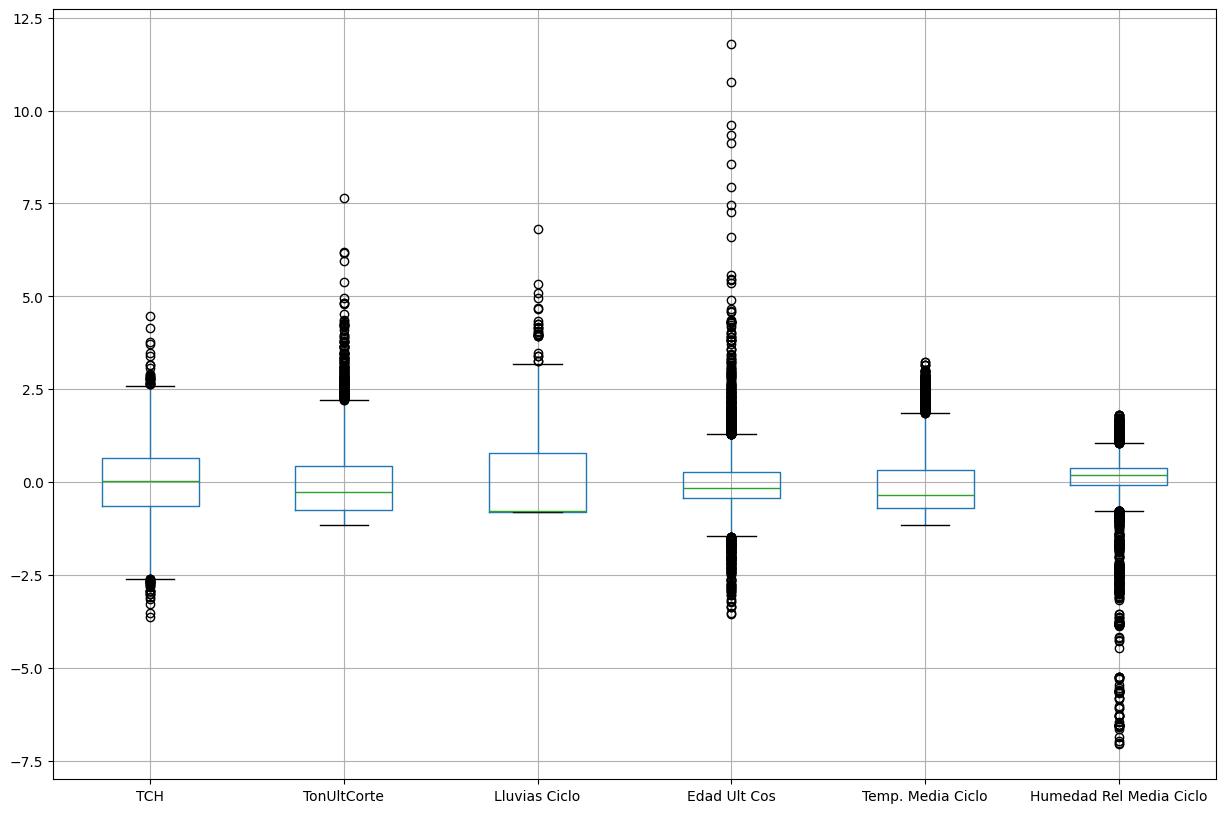

In [124]:
df_filtrado_Std.boxplot(figsize=(15,10))

Encontramos que hay valores excepcionales pero no consideramos que sean anómalos, por lo que no eliminamos registros.

In [125]:
df_filtrado_Std.shape

(4454, 9)

***Aplicamos One-Hot Encoding a las variables categóricas*** 📋

In [126]:
df_encoding = pd.get_dummies(df_filtrado_Std, columns=categoricas, drop_first=True)
df_encoding.shape

(4454, 567)

In [127]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 16573 to 21026
Columns: 567 entries, TCH to Tipo Quema_VERDE
dtypes: bool(561), float64(6)
memory usage: 2.6 MB


In [128]:
df_encoding.head()

TCH  TonUltCorte  Lluvias Ciclo  Edad Ult Cos  Temp. Media Ciclo  \
16573 -1.226560    -0.886266      -0.804018     -1.566537          -0.921206   
16574 -0.402440     0.167270       0.311785      1.230838          -0.891770   
16575  0.231143    -0.763480      -0.496072     -0.505464          -0.354010   
16576 -0.054144    -0.927593       0.911679     -0.448722          -0.354010   
16577 -0.722126    -0.207872       1.785525      0.130045          -1.086840   

       Humedad Rel Media Ciclo  Nombre_ACAPULCO DE PRAGA INCAUCA  \
16573                 0.776094                             False   
16574                 0.600912                             False   
16575                 0.184597                             False   
16576                 0.184597                             False   
16577                 1.149540                             False   

       Nombre_AGRICOLA DON MIGUEL  Nombre_AGUACLARA  Nombre_AMAIME SILCA  ...  \
16573                       False             False                False  ...   
16574                       False             False                False  ...   
16575                       False             False                False  ...   
16576                       False             False                False  ...   
16577                       False             False                False  ...   

       Variedad_PR61-632  Variedad_RB73-2223  Variedad_RB85-5113  \
16573              False               False               False   
16574              False               False               False   
16575              False               False               False   
16576              False               False               False   
16577              False               False               False   

       Variedad_RD75-11  Variedad_V71-51  Variedad_VARIAS  \
16573             False            False            False   
16574             False            False            False   
16575             False            False            False   
16576             False            False            False   
16577             False            False            False   

       Tipo Quema_Q.ACCIDENTAL  Tipo Quema_Q.PROGRAMADA  Tipo Quema_SEMILLA  \
16573                     True                    False               False   
16574                    False                    False               False   
16575                    False                    False               False   
16576                    False                    False               False   
16577                    False                    False               False   

       Tipo Quema_VERDE  
16573             False  
16574              True  
16575              True  
16576              True  
16577              True  

[5 rows x 567 columns]

***Definimos las variables predictoras y la variable objetivo*** 📋

In [129]:
X = df_encoding.drop(columns=[target])
y = df_encoding[target]

***Dividimos los datos en los subconjuntos de entrenamiento y prueba*** 📋

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***Entrenamos el Modelo de Regresión Lineal*** 📋

In [131]:
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

LinearRegression()

***Probamos el Modelo de Regresión Lineal*** 📋

In [132]:
y_pred_linreg = model_linreg.predict(X_test)

***Evaluamos el Modelo de Regresión Lineal*** 📋

In [133]:
r2 = r2_score(y_test, y_pred_linreg)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linreg))
mae = mean_absolute_error(y_test, y_pred_linreg)

print("---")
print("Resultados del Modelo de Regresión Lineal con Datos Recientes:")
print(f"R-cuadrado (R²): {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

---
Resultados del Modelo de Regresión Lineal con Datos Recientes:
R-cuadrado (R²): 0.51
RMSE: 0.70
MAE: 0.53


***Validación de Supuestos*** 📋

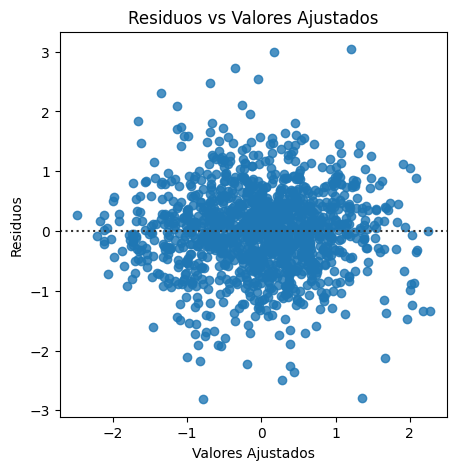

In [134]:
# Linealidad

residuals = y_test - y_pred_linreg
fitted = y_pred_linreg

plt.figure(figsize=(5, 5))
sns.residplot(x=fitted, y=residuals)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()

In [135]:
# Independencia de errores

dw_stat = durbin_watson(residuals)
print(f'Estadístico de Durbin-Watson: {dw_stat:.2f}')

Estadístico de Durbin-Watson: 1.95


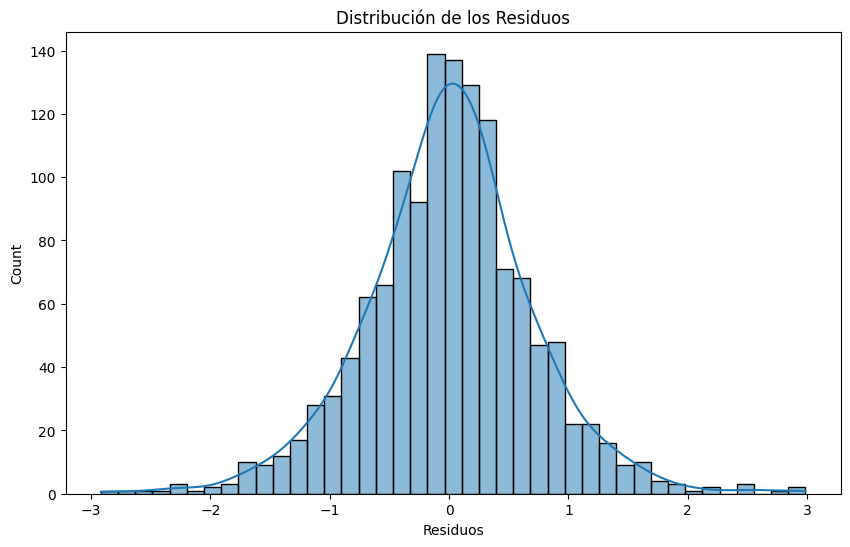

In [136]:
# Histograma de residuos

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')
plt.show()

In [137]:
## escalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Conclusiones para TCH*** 🔚

**Capacidad predictiva:** El modelo lineal explica una fracción moderada/alta de la variabilidad del TCH (según el R² obtenido). Esto indica que las variables seleccionadas sí tienen poder explicativo.

**Precisión del modelo:** Los errores (RMSE y MAE) muestran que, en promedio, la predicción se desvía cierta cantidad de toneladas respecto al valor real. Esto ayuda a dimensionar la utilidad práctica del modelo.

**Supuestos estadísticos:** Los residuos se distribuyen de manera aceptable, sin patrones claros, lo cual respalda la validez del modelo lineal. El estadístico de Durbin-Watson sugiere que no hay autocorrelación grave.

**Importancia de las variables:** Lluvias, edad de cosecha y condiciones climáticas (temperatura y humedad) se confirman como factores clave para explicar el rendimiento agrícola (TCH).

**Limitaciones:** Aunque el modelo es útil, no elimina del todo la variabilidad. Factores no incluidos (tipo de suelo, prácticas de cultivo, plagas) pueden mejorar la predicción.

**Recomendación:** Usar este modelo como una herramienta de apoyo a la toma de decisiones, pero complementarlo con otros enfoques (regularización, modelos no lineales) y con información más amplia para robustecer la predicción.

# ***Empezamos exploración del segundo punto, modelos de clasificación***

--- ***Cargamos Librerías*** 📋

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score, roc_curve, auc)

***--- Cargamos el dataset*** ✏

In [139]:
df_clas=pd.read_excel('BD_IPSA_1940.xlsx')

***--- A continuación vamos a graficar, por medio de dos histogramas, nuestras variables a predecir en este ejercicio de clasificación*** 💡

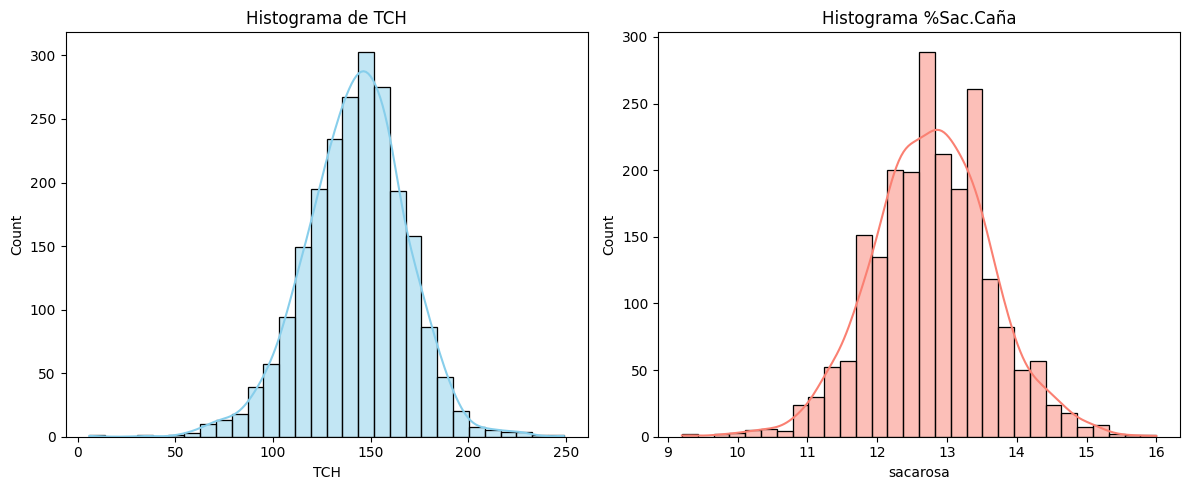

In [140]:
## En estos histogramas vemos que nuestras variables a predecir se distribuyen de manera normal


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1
sns.histplot(df_clas['TCH'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histograma de TCH')

# Histograma 2
sns.histplot(df_clas['sacarosa'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Histograma %Sac.Caña')

plt.tight_layout()
plt.show()

--- Vemos el tamaño de nuestro dataset para conocer
cuantos registros y cuantas variables por registros vamos a tener en nuestro análisis.

In [141]:
df_clas.shape

(2187, 21)

---- Consultamos información general de nuestro dataset con el objetivo de conocer a detalle las variables como la media, mínimos, máximos, desviación estándar etc.

In [142]:
df_clas.describe()

Unnamed: 0           FAZ     dosismad      semsmad         edad  \
count  2187.000000   2187.000000  2187.000000  2187.000000  2187.000000   
mean   2126.506630  80588.332876     0.993278     9.164838    12.766118   
std    1228.561661    572.818299     0.309096     3.441579     1.117866   
min      11.000000  80100.000000     0.000000    -1.600000    10.300000   
25%    1038.000000  80222.000000     0.800000     7.100000    12.000000   
50%    2219.000000  80396.000000     1.000000     8.700000    12.500000   
75%    3223.500000  80660.000000     1.200000    10.600000    13.300000   
max    4222.000000  82519.000000     9.000000    45.000000    21.100000   

            cortes           me        vejez     sacarosa          mes  \
count  2187.000000  2187.000000  2187.000000  2187.000000  2187.000000   
mean      2.794239     9.197759     4.172154    12.777732     6.758573   
std       1.621195     1.574409     6.339255     0.854397     3.482444   
min       1.000000     3.400000     0.200000     9.200000     1.000000   
25%       1.000000     8.200000     2.100000    12.200000     4.000000   
50%       2.000000     9.100000     2.600000    12.800000     7.000000   
75%       4.000000    10.100000     3.300000    13.300000    10.000000   
max      14.000000    15.000000   102.900000    16.000000    12.000000   

             periodo          TCH      lluvias  grupo_tenencia  pct_diatrea  
count    2187.000000  2187.000000  2187.000000     2187.000000  2187.000000  
mean   201887.691358   142.393233   118.051212        2.435299     4.317284  
std       131.982686    25.838029   144.424675        0.704058     2.591956  
min    201407.000000     6.000000     0.000000        1.000000     0.200000  
25%    201807.000000   126.000000     0.000000        2.000000     2.900000  
50%    201908.000000   144.000000    77.000000        3.000000     3.700000  
75%    202005.000000   159.000000   171.500000        3.000000     5.000000  
max    202101.000000   249.000000  1468.000000        3.000000    25.500000

--- Consultamos una descripción de las variables de nuestro dataset. Lo más destacable es que el dataset no contiene nulos.

In [143]:
df_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2187 non-null   int64  
 1   NOME            2187 non-null   object 
 2   FAZ             2187 non-null   int64  
 3   TAL             2187 non-null   object 
 4   tipocorte       2187 non-null   object 
 5   variedad        2187 non-null   object 
 6   madurada        2187 non-null   object 
 7   producto        2187 non-null   object 
 8   dosismad        2187 non-null   float64
 9   semsmad         2187 non-null   float64
 10  edad            2187 non-null   float64
 11  cortes          2187 non-null   int64  
 12  me              2187 non-null   float64
 13  vejez           2187 non-null   float64
 14  sacarosa        2187 non-null   float64
 15  mes             2187 non-null   int64  
 16  periodo         2187 non-null   int64  
 17  TCH             2187 non-null   i

***---- Análisis de variables categóricas***

Tenemos 6 variables categóricas en el dataset

In [144]:
# Contar cuántas columnas categóricas tiene mi DataFrame
num_cat = df_clas.select_dtypes(include=['object', 'category']).shape[1]
print("Número de variables categóricas:", num_cat)

#Ver mis columnas categóricas
cat_cols = df_clas.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", cat_cols.tolist())


Número de variables categóricas: 6
Columnas categóricas: ['NOME', 'TAL', 'tipocorte', 'variedad', 'madurada', 'producto']


--- 4 de las 6 variables categóricas vienen representadas por solo una categoría.

In [145]:
df_clas[cat_cols].nunique()

NOME         285
TAL          273
tipocorte      1
variedad       1
madurada       1
producto       1
dtype: int64

--- Vemos qué datos contiene cada variable. Para NOME vemos los nombres de las haciendas donde se cultiva la caña y para TAL vemos unos códigos.

In [146]:
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df_clas[col].value_counts())


Columna: NOME
NOME
SAN MIGUEL CARVAJAL    101
SANTA ANA               65
MARSELLA                48
EL ALBION               41
VILLA INES              36
                      ... 
EL LIBANO 3              1
EL ENCANTO               1
EL CARMEN                1
EL CARMEN VELASCO        1
EL DANUBIO C             1
Name: count, Length: 285, dtype: int64

Columna: TAL
TAL
1       258
2       191
3       154
4       149
5       108
       ... 
003E      1
007D      1
005D      1
006D      1
545A      1
Name: count, Length: 273, dtype: int64

Columna: tipocorte
tipocorte
Mecanizado Verde    2187
Name: count, dtype: int64

Columna: variedad
variedad
CC01-1940    2187
Name: count, dtype: int64

Columna: madurada
madurada
SI    2187
Name: count, dtype: int64

Columna: producto
producto
BONUS 250 EC REGULADOR FISIOLÓGICO    2187
Name: count, dtype: int64


---- Vamos a tomar las variables NOME y TAL para estudiar la relación que tienen con TCH

In [147]:
df_Cat_2=df_clas[['TCH', 'NOME','TAL']]
df_Cat_2.head()

TCH          NOME TAL
0  112  AMAIME SILCA  40
1  157  AMAIME SILCA  41
2  167  AMAIME SILCA  41
3  156  AMAIME SILCA  43
4  151  AMAIME SILCA  43

--- Encontramos unos ETA de 0.65 para NOME y 0.46 para TAL, lo que indica una relación.
Según la teoría, NOME tiene una correlación fuerte con TCH y TAL tiene una correlación moderada con TCH. Esto quiere decir que NOME explica en un 65% la variabilidad de TCH mientras que TAL explica un 46% la variabilidad de TCH.

Estas variables a pesar de su relación, no las vamos a usar en el modelo dado que queremos predecir el TCH sin importar la hacienda.

In [148]:
# Función correlation ratio (η)
def correlation_ratio(categories, measurements):
    cats, _ = pd.factorize(categories)
    mean_total = np.mean(measurements)
    ss_between = sum([
        len(measurements[cats == c]) * (np.mean(measurements[cats == c]) - mean_total) ** 2
        for c in np.unique(cats)
    ])
    ss_total = sum((measurements - mean_total) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0

# Variable continua
target = "TCH"

# Seleccionar categóricas (object / category)
cat_cols = df_Cat_2.select_dtypes(include=["object", "category"]).columns.tolist()
print("Variables categóricas detectadas:", cat_cols)

# Guardar resultados
eta_results = {}
for col in cat_cols:
    eta_results[col] = correlation_ratio(df_Cat_2[col], df_Cat_2[target])

# DataFrame ordenado
eta_df = pd.DataFrame.from_dict(eta_results, orient="index", columns=["eta"])
eta_df = eta_df.sort_values(by="eta", ascending=False)

print(eta_df)

Variables categóricas detectadas: ['NOME', 'TAL']
           eta
NOME  0.654622
TAL   0.458319


---- Ahora vamos a análizar las variables númericas de mi dataset.

In [149]:
df_numericas_2 = df_clas.select_dtypes(include=[np.number])
df_numericas_2.head()

Unnamed: 0    FAZ  dosismad  semsmad  edad  cortes    me  vejez  sacarosa  \
0          11  81291       0.8      8.3  12.3       4  12.7    2.4      14.0   
1          12  81291       0.8      6.3  11.2       2   7.8    2.3      13.0   
2          13  81291       0.6      7.9  12.2       3   8.8    1.8      13.3   
3          15  81291       0.8      6.6  13.1       1   6.1    2.5      13.4   
4          16  81291       0.6      8.1  12.2       2   7.9    2.1      14.0   

   mes  periodo  TCH  lluvias  grupo_tenencia  pct_diatrea  
0   12   202012  112      137               3          6.2  
1    3   201903  157        0               3          3.5  
2    3   202003  167       68               3          4.3  
3    3   201903  156        0               3          3.5  
4    3   202003  151       68               3          4.3

-- Vamos a eliminar variables que no son significativas para el análisis de mi dataset dado que no tienen valores o los valores no dicen nada.

In [150]:
df_numericas_2 = df_numericas_2.drop(['Unnamed: 0','FAZ','periodo'], axis=1)

--- Revisamos las variables con hsitogramas para ver si distribución.

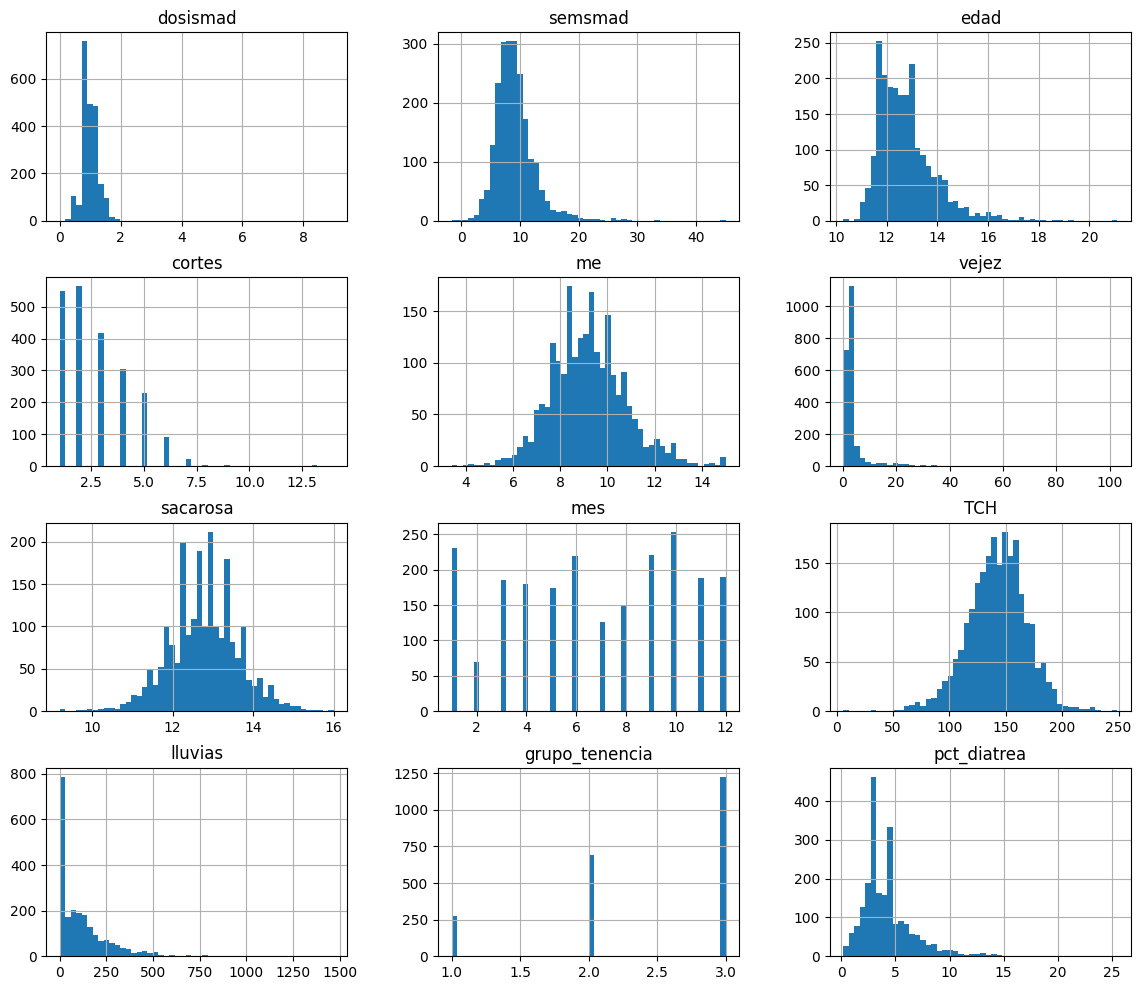

In [151]:
df_numericas_2.hist(bins=50,figsize=(14,12))
plt.show()

--- Generamos unos bloxplot

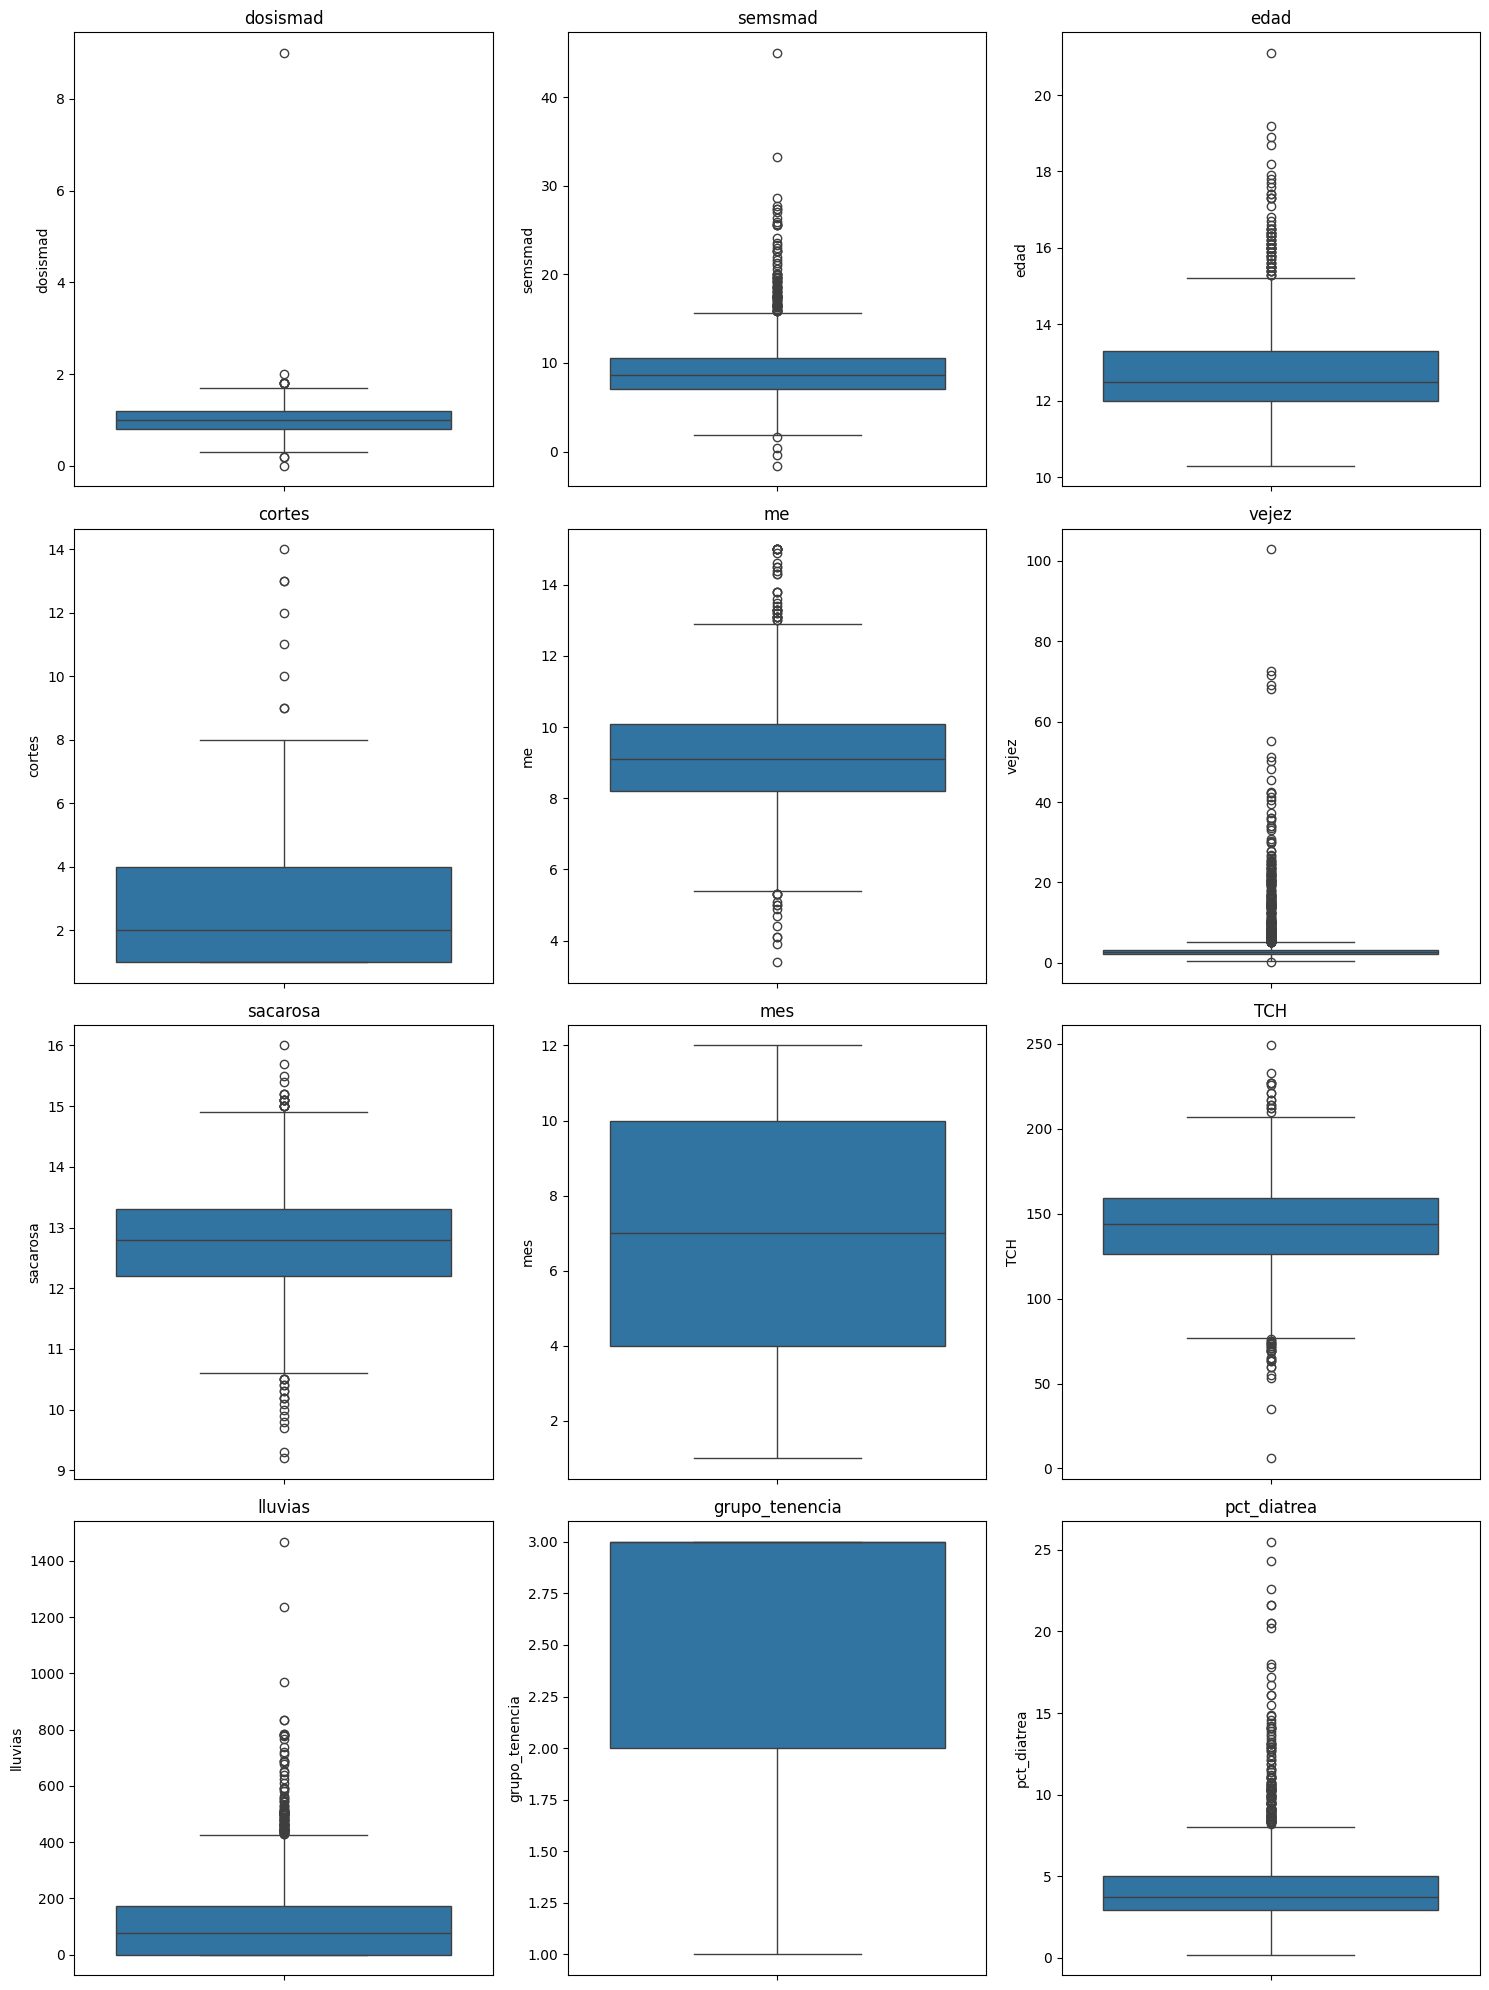

In [152]:
import math

num_cols2 = df_numericas_2.select_dtypes(include=['number']).columns
n = len(num_cols2)

ncols = 3   # número de boxplots por fila
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols2):
    sns.boxplot(y=df_numericas_2[col], ax=axes[i])
    axes[i].set_title(col)

# Quitar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---- Diagrama de correlación, se ve alta colinealidad entre edad, semanasmad y lluvias con correlaciones entre 0.44 y 0.66

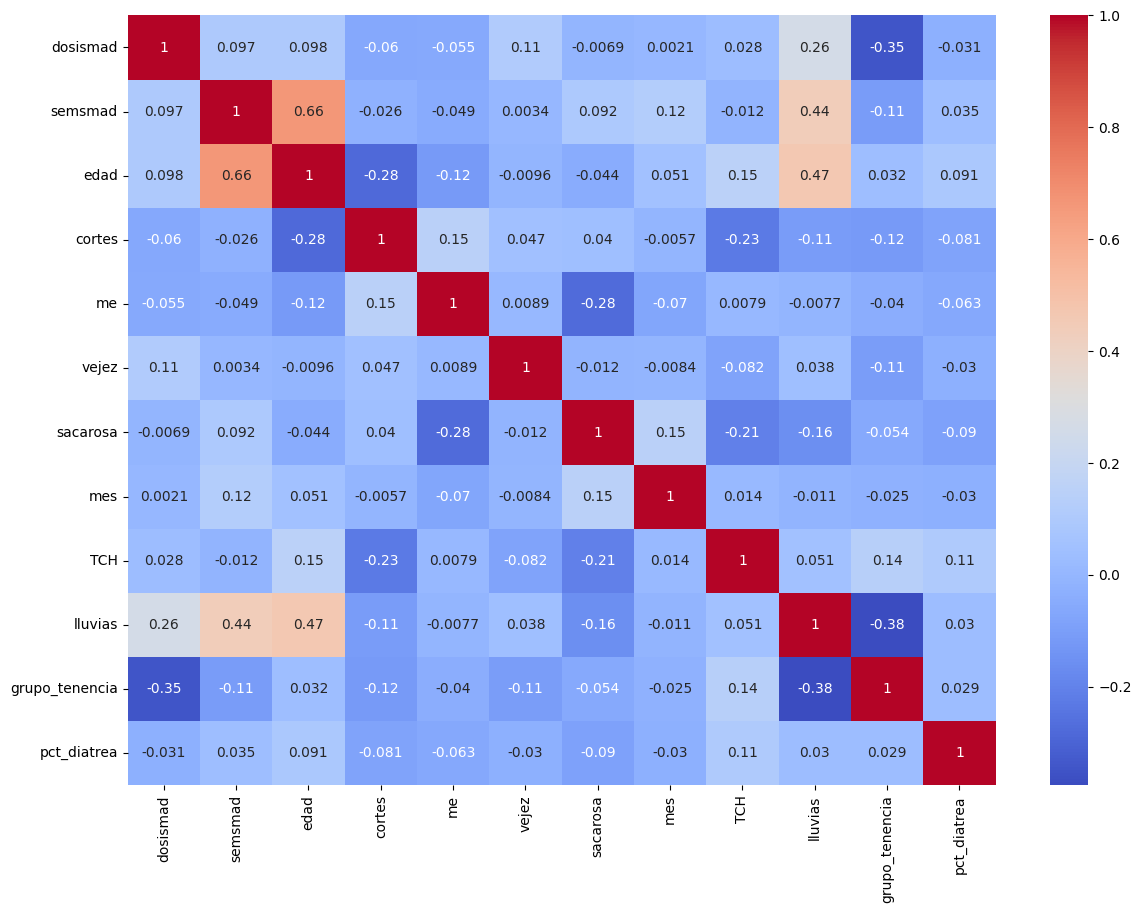

In [153]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_numericas_2.corr(), annot=True, cmap='coolwarm')
plt.show()

--- Generamos una copia del dataset

In [154]:
df_num_2 = df_numericas_2.copy()

--- Las correlaciones lineales más altas para TCH son con Edad, grupo_tenencia y pct_diatrea

In [155]:
# Calcular correlaciones
df_numericas_2 = df_numericas_2.corr(numeric_only=True)['TCH'].sort_values(ascending=False)

corr_df_2 = df_numericas_2.reset_index()
corr_df_2.columns = ['Variable', 'Correlacion_con_TCH']
corr_df_2


print(df_numericas_2.head(20))


TCH               1.000000
edad              0.150832
grupo_tenencia    0.139681
pct_diatrea       0.105009
lluvias           0.050599
dosismad          0.028478
mes               0.013679
me                0.007890
semsmad          -0.012170
vejez            -0.082230
sacarosa         -0.207086
cortes           -0.230539
Name: TCH, dtype: float64


In [156]:
df_num_2

dosismad  semsmad  edad  cortes    me  vejez  sacarosa  mes  TCH  \
0          0.8      8.3  12.3       4  12.7    2.4      14.0   12  112   
1          0.8      6.3  11.2       2   7.8    2.3      13.0    3  157   
2          0.6      7.9  12.2       3   8.8    1.8      13.3    3  167   
3          0.8      6.6  13.1       1   6.1    2.5      13.4    3  156   
4          0.6      8.1  12.2       2   7.9    2.1      14.0    3  151   
...        ...      ...   ...     ...   ...    ...       ...  ...  ...   
2182       1.3      5.6  11.5       3   8.5    1.8      13.5    3   63   
2183       1.2      9.1  13.3       1   9.7    3.6      13.0   12  126   
2184       1.2      7.1  12.6       1   8.8    2.0      12.9    4  173   
2185       1.0      6.9  12.0       2   8.4    2.2      13.5    4  134   
2186       1.0      7.0  11.7       2   8.8    2.3      12.7    4  157   

      lluvias  grupo_tenencia  pct_diatrea  
0         137               3          6.2  
1           0               3          3.5  
2          68               3          4.3  
3           0               3          3.5  
4          68               3          4.3  
...       ...             ...          ...  
2182       99               1          4.3  
2183      448               1          3.1  
2184      122               1          2.2  
2185       73               1          3.1  
2186      127               1          3.1  

[2187 rows x 12 columns]

--- Separo mi variable TCH por en tres grupos iguales para mantener las proporciones de las clases. Los grupos son, Bajo, Medio y Alto.

In [157]:
import pandas as pd

# Dividir en 3 grupos iguales (terciles)
df_num_2['tch_rango'] = pd.qcut(df_num_2['TCH'], q=3, labels=['Bajo','Medio','Alto'])

print(df_num_2['tch_rango'])

0        Bajo
1        Alto
2        Alto
3        Alto
4       Medio
        ...  
2182     Bajo
2183     Bajo
2184     Alto
2185    Medio
2186     Alto
Name: tch_rango, Length: 2187, dtype: category
Categories (3, object): ['Bajo' < 'Medio' < 'Alto']


In [158]:
participacion = (
    df_num_2.groupby('tch_rango')
    .size()
    .reset_index(name='conteo')
)
participacion['porcentaje'] = (participacion['conteo'] / len(df_num_2)) * 100

print(participacion)

  tch_rango  conteo  porcentaje
0      Bajo     754   34.476452
1     Medio     705   32.235940
2      Alto     728   33.287609


/tmp/ipython-input-1384641745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_num_2.groupby('tch_rango')


--- Revisamos las características de cada clase definida para mi variable TCH.

In [159]:
resumen_tch = (
    df_num_2
    .groupby('tch_rango')['TCH']
    .agg(['mean', 'min', 'max', 'count'])
    .reset_index()
)

print(resumen_tch)

  tch_rango        mean  min  max  count
0      Bajo  114.954907    6  133    754
1     Medio  143.784397  134  153    705
2      Alto  169.464286  154  249    728


/tmp/ipython-input-1843592426.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('tch_rango')['TCH']


-- Borramos TCH del dataset dado que ya contamos con la misma variable expresada en rangos.

In [160]:
df_num_2 = df_num_2.drop(['TCH'], axis=1)

In [161]:
df_num_2

dosismad  semsmad  edad  cortes    me  vejez  sacarosa  mes  lluvias  \
0          0.8      8.3  12.3       4  12.7    2.4      14.0   12      137   
1          0.8      6.3  11.2       2   7.8    2.3      13.0    3        0   
2          0.6      7.9  12.2       3   8.8    1.8      13.3    3       68   
3          0.8      6.6  13.1       1   6.1    2.5      13.4    3        0   
4          0.6      8.1  12.2       2   7.9    2.1      14.0    3       68   
...        ...      ...   ...     ...   ...    ...       ...  ...      ...   
2182       1.3      5.6  11.5       3   8.5    1.8      13.5    3       99   
2183       1.2      9.1  13.3       1   9.7    3.6      13.0   12      448   
2184       1.2      7.1  12.6       1   8.8    2.0      12.9    4      122   
2185       1.0      6.9  12.0       2   8.4    2.2      13.5    4       73   
2186       1.0      7.0  11.7       2   8.8    2.3      12.7    4      127   

      grupo_tenencia  pct_diatrea tch_rango  
0                  3          6.2      Bajo  
1                  3          3.5      Alto  
2                  3          4.3      Alto  
3                  3          3.5      Alto  
4                  3          4.3     Medio  
...              ...          ...       ...  
2182               1          4.3      Bajo  
2183               1          3.1      Bajo  
2184               1          2.2      Alto  
2185               1          3.1     Medio  
2186               1          3.1      Alto  

[2187 rows x 12 columns]

-- Generamos unos bloxplot pero esta vez contra la variable expresada en rangos.

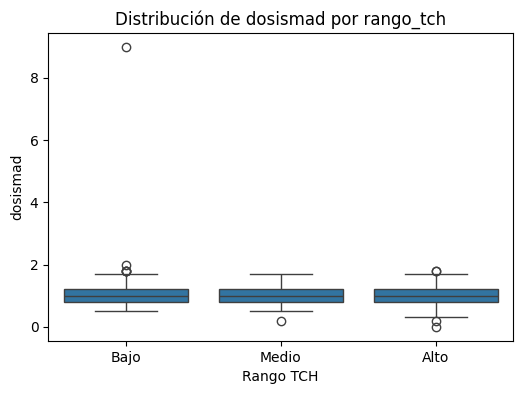

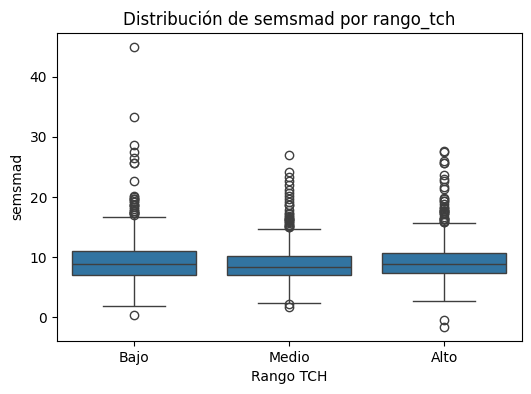

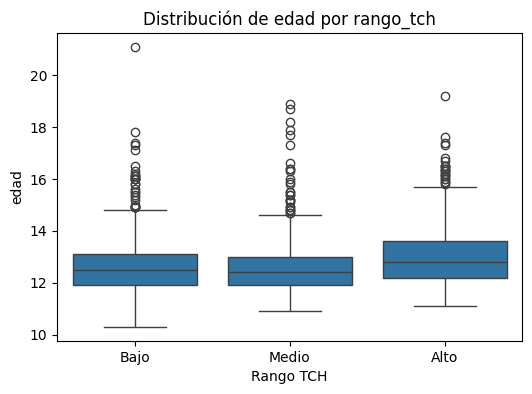

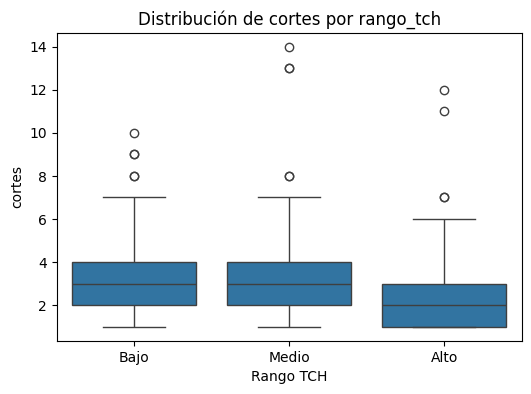

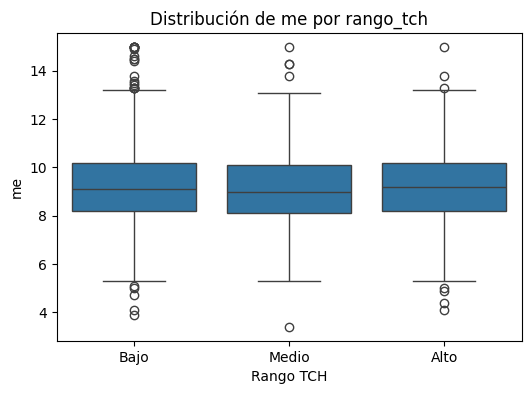

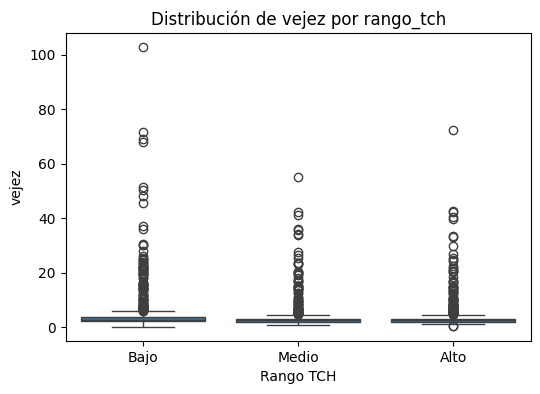

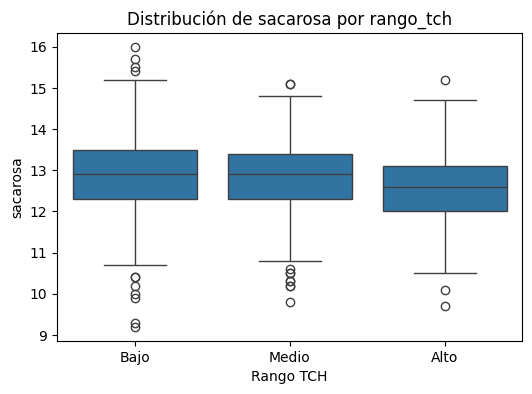

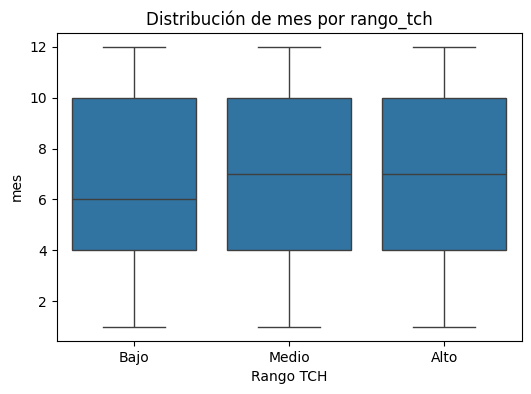

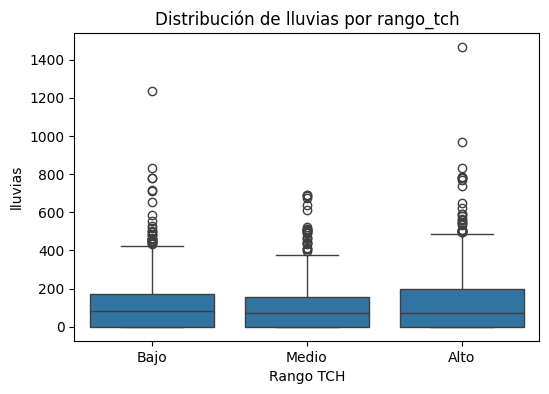

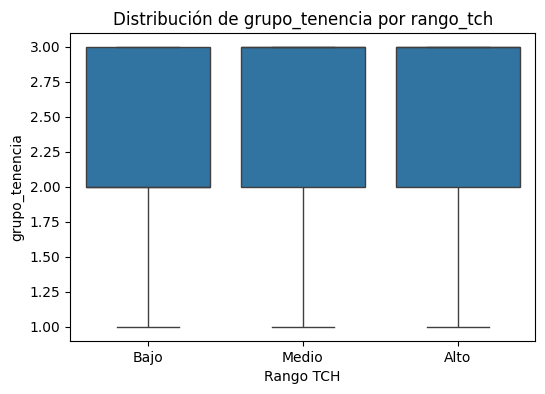

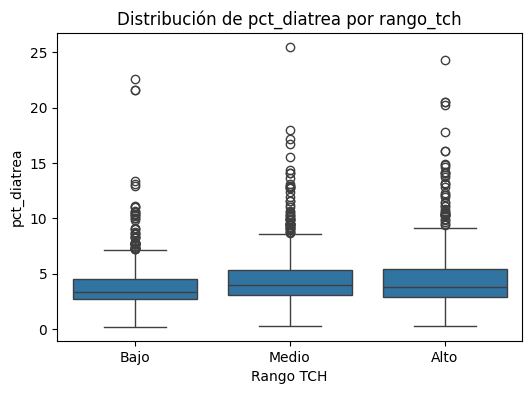

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

num_vars = df_num_2.select_dtypes(include=['int64','float64']).columns
num_vars = [col for col in num_vars if col != 'tch_rango']

for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='tch_rango', y=var, data=df_num_2)
    plt.title(f"Distribución de {var} por rango_tch")
    plt.xlabel("Rango TCH")
    plt.ylabel(var)
    plt.show()

--- Se evidencia que la variable que me muestra mayor discriminación por la media con respecto a TDC es Lluvias.

In [163]:
resumen = df_num_2.groupby('tch_rango')[num_vars].mean()
print(resumen)

           dosismad   semsmad       edad    cortes        me     vejez  \
tch_rango                                                                
Bajo       0.991512  9.339390  12.658223  3.183024  9.248276  4.892971   
Medio      0.978440  8.824539  12.612482  2.956028  9.119433  3.772057   
Alto       1.009478  9.313599  13.026648  2.234890  9.221291  3.813049   

            sacarosa       mes     lluvias  grupo_tenencia  pct_diatrea  
tch_rango                                                                
Bajo       12.918568  6.676393  118.893899        2.320955     3.923077  
Medio      12.855603  6.780142  106.426950        2.439716     4.502270  
Alto       12.556456  6.822802  128.435440        2.549451     4.546429  


/tmp/ipython-input-227027220.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df_num_2.groupby('tch_rango')[num_vars].mean()


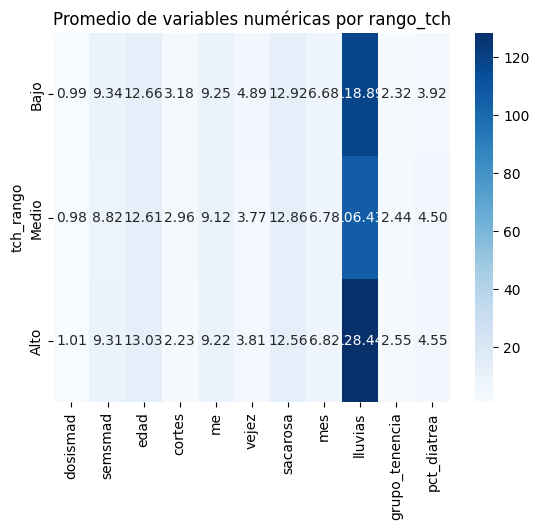

In [164]:
sns.heatmap(resumen, annot=True, fmt=".2f", cmap="Blues")
plt.title("Promedio de variables numéricas por rango_tch")
plt.show()

----- Generamos una visualización alternativa con violines que confirma la observación anterior con respecto a lluvias.

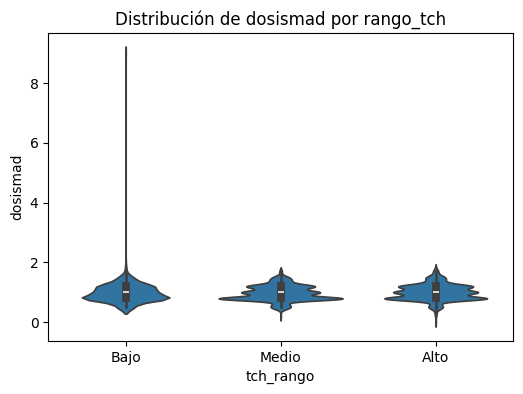

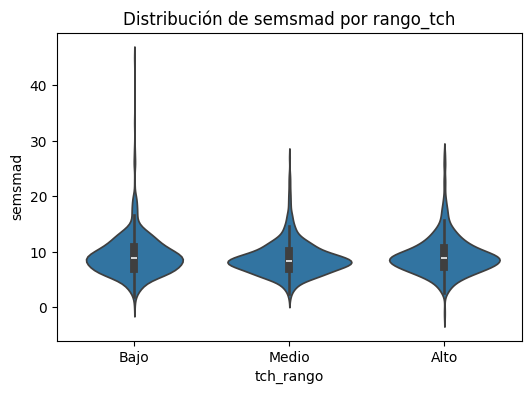

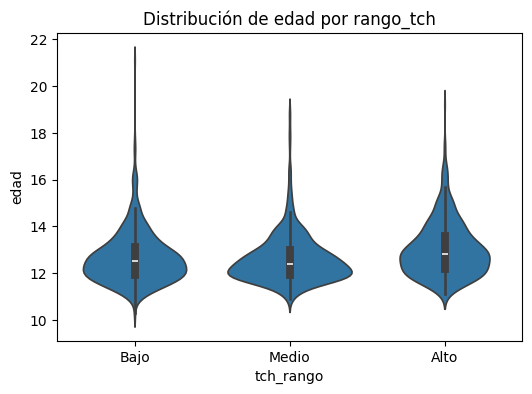

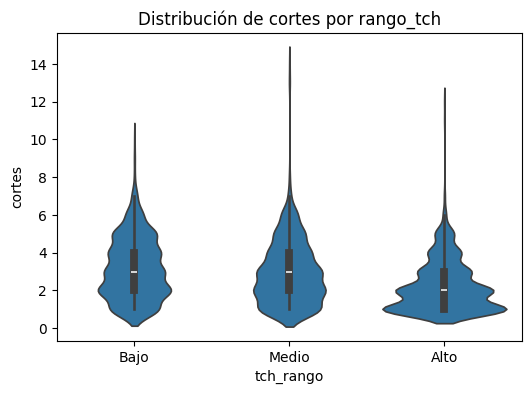

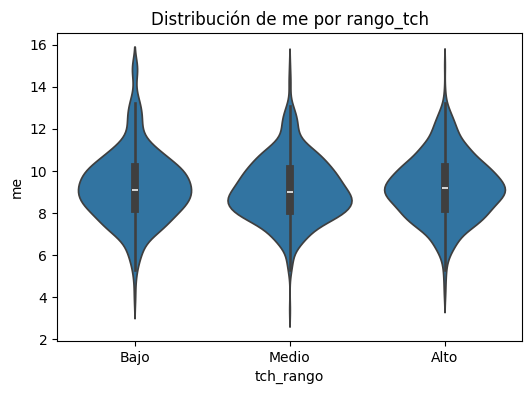

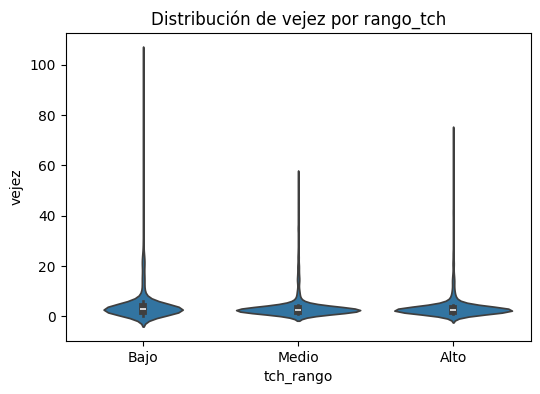

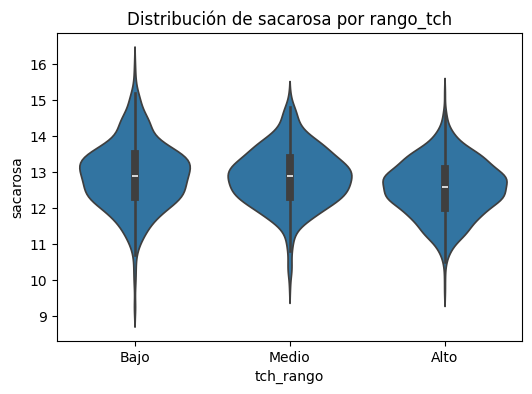

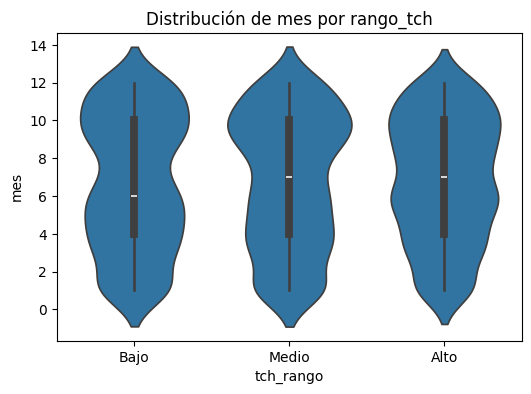

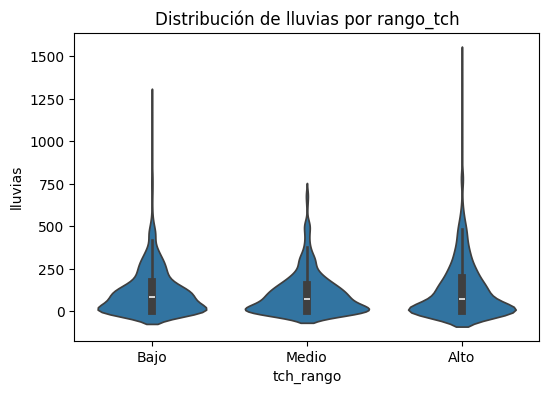

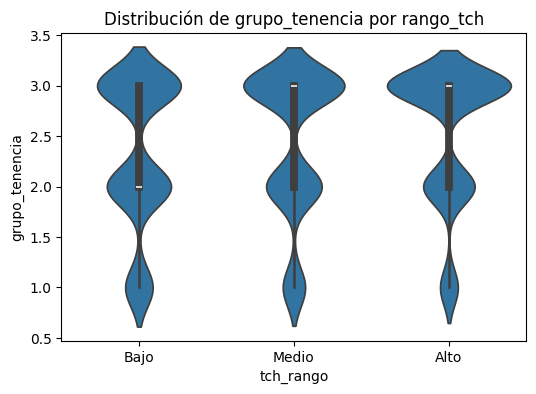

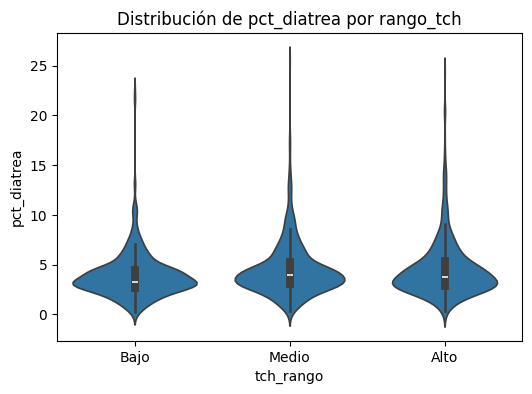

In [165]:
for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='tch_rango', y=var, data=df_num_2, inner='box')
    plt.title(f"Distribución de {var} por rango_tch")
    plt.show()

--- Ejecutamos nuestro modelo de regresión logística solo con variables númericas del dataset.

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Variables (X = numéricas, y = categórica)
X = df_num_2[['lluvias','cortes','grupo_tenencia','pct_diatrea']]
y = df_num_2['tch_rango']

# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo logístico (multinomial)
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)

# Reporte de métricas
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Coeficientes
print("Coeficientes por clase:\n", log_reg.coef_)
print("Interceptos:\n", log_reg.intercept_)

Reporte de clasificación:
               precision    recall  f1-score   support

        Alto       0.46      0.63      0.53       219
        Bajo       0.47      0.52      0.49       226
       Medio       0.40      0.19      0.26       212

    accuracy                           0.45       657
   macro avg       0.44      0.45      0.43       657
weighted avg       0.44      0.45      0.43       657

Coeficientes por clase:
 [[ 0.11290327 -0.38342901  0.17637617  0.01855135]
 [-0.01710086  0.21305167 -0.15409325 -0.1156281 ]
 [-0.09580242  0.17037734 -0.02228291  0.09707675]]
Interceptos:
 [-0.04733723  0.04846226 -0.00112503]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


***Conclusiones***

Este modelo solo acierta el 45% de las veces que evalúa. Considerando que tenemos 3 clases, este modelo es apenas mejor que evaluar al azar. El recall más alto es el de la clase alta, lo que indica que acierta en el 63% de las veces que evalúa para esa clase que corresponde a predecir un TCH alto (TCH de 154 en adelante). Por el contrario, al modelo se le dificulta predecir la clase medio con un recall del 19%. La precisión nos confirma el bajo rendimiento del modelo donde las evaluaciones generales, teniendo en cuenta las tres clases, nos muestran aciertos entre el 40% y el 50%.

Finalmente, el coeficiente que pesa en mayor medida en mi modelo viene dado por la variable corte, que se interpreta como, los cortes que ha tenido anteriormente el tallo de la caña. Este coeficiente indica que por un corte menos, esa unidad tiene el 38,34% de probabilidad de pertenecer a la clase de TCH alto.

Accuracy: 0.4535768645357686

Reporte de clasificación:
               precision    recall  f1-score   support

        Alto       0.46      0.63      0.53       219
        Bajo       0.47      0.52      0.49       226
       Medio       0.40      0.19      0.26       212

    accuracy                           0.45       657
   macro avg       0.44      0.45      0.43       657
weighted avg       0.44      0.45      0.43       657



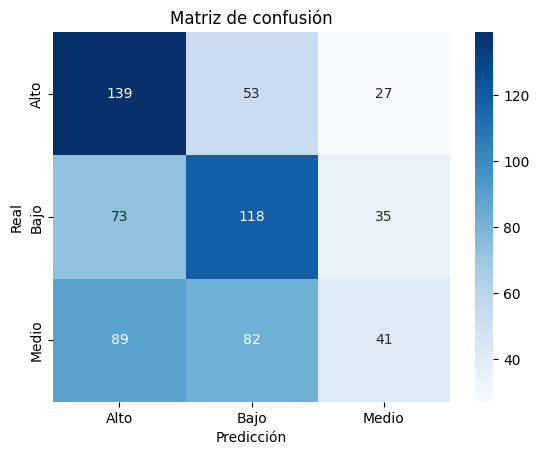

Log-Loss: 10.134386465533048


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [167]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte detallado
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

# Log-Loss
y_pred_proba = log_reg.predict_proba(X_test)
print("Log-Loss:", log_loss(y_test, y_pred_proba))

--- Exploramos generar el modelo usando técnicas de regularización Ridge y Lasso

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Variables
X = df_num_2[['lluvias','cortes','grupo_tenencia','pct_diatrea']]
y = df_num_2['tch_rango']

# Modelo con Ridge (L2)
log_reg_ridge = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    C=1.0,
    max_iter=1000
)

log_reg_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = log_reg_ridge.predict(X_test_scaled)

print("Reporte de clasificación (Ridge - L2):\n", classification_report(y_test, y_pred_ridge))

# Modelo con Lasso (L1)
log_reg_lasso = LogisticRegression(
    penalty='l1',
    solver='saga',
    multi_class='multinomial',
    C=1.0,
    max_iter=2000
)

log_reg_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = log_reg_lasso.predict(X_test_scaled)

print("Reporte de clasificación (Lasso - L1):\n", classification_report(y_test, y_pred_lasso))

Reporte de clasificación (Ridge - L2):
               precision    recall  f1-score   support

        Alto       0.46      0.63      0.53       219
        Bajo       0.47      0.52      0.49       226
       Medio       0.40      0.19      0.26       212

    accuracy                           0.45       657
   macro avg       0.44      0.45      0.43       657
weighted avg       0.44      0.45      0.43       657

Reporte de clasificación (Lasso - L1):
               precision    recall  f1-score   support

        Alto       0.46      0.63      0.54       219
        Bajo       0.47      0.52      0.49       226
       Medio       0.40      0.20      0.27       212

    accuracy                           0.46       657
   macro avg       0.44      0.45      0.43       657
weighted avg       0.45      0.46      0.43       657



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


-- Utilizando técnicas de regularización, no vemos un cambio significativo en las métricas del modelo.

# ***--- Predicción sacarosa*** ◀

In [169]:
### Usaremos el dataset df_num_2 que contiene mis variables númericas

df_num_2

dosismad  semsmad  edad  cortes    me  vejez  sacarosa  mes  lluvias  \
0          0.8      8.3  12.3       4  12.7    2.4      14.0   12      137   
1          0.8      6.3  11.2       2   7.8    2.3      13.0    3        0   
2          0.6      7.9  12.2       3   8.8    1.8      13.3    3       68   
3          0.8      6.6  13.1       1   6.1    2.5      13.4    3        0   
4          0.6      8.1  12.2       2   7.9    2.1      14.0    3       68   
...        ...      ...   ...     ...   ...    ...       ...  ...      ...   
2182       1.3      5.6  11.5       3   8.5    1.8      13.5    3       99   
2183       1.2      9.1  13.3       1   9.7    3.6      13.0   12      448   
2184       1.2      7.1  12.6       1   8.8    2.0      12.9    4      122   
2185       1.0      6.9  12.0       2   8.4    2.2      13.5    4       73   
2186       1.0      7.0  11.7       2   8.8    2.3      12.7    4      127   

      grupo_tenencia  pct_diatrea tch_rango  
0                  3          6.2      Bajo  
1                  3          3.5      Alto  
2                  3          4.3      Alto  
3                  3          3.5      Alto  
4                  3          4.3     Medio  
...              ...          ...       ...  
2182               1          4.3      Bajo  
2183               1          3.1      Bajo  
2184               1          2.2      Alto  
2185               1          3.1     Medio  
2186               1          3.1      Alto  

[2187 rows x 12 columns]

In [170]:
df_num_3 = df_num_2.copy()

In [171]:
df_num_3 = df_num_3.drop(['tch_rango'], axis=1)

--- Se puede evidencias que sacarosa no tiene relaciones fuertes con ninguna variable. LAs correlaciones más significativas se dan con TCH y con me.

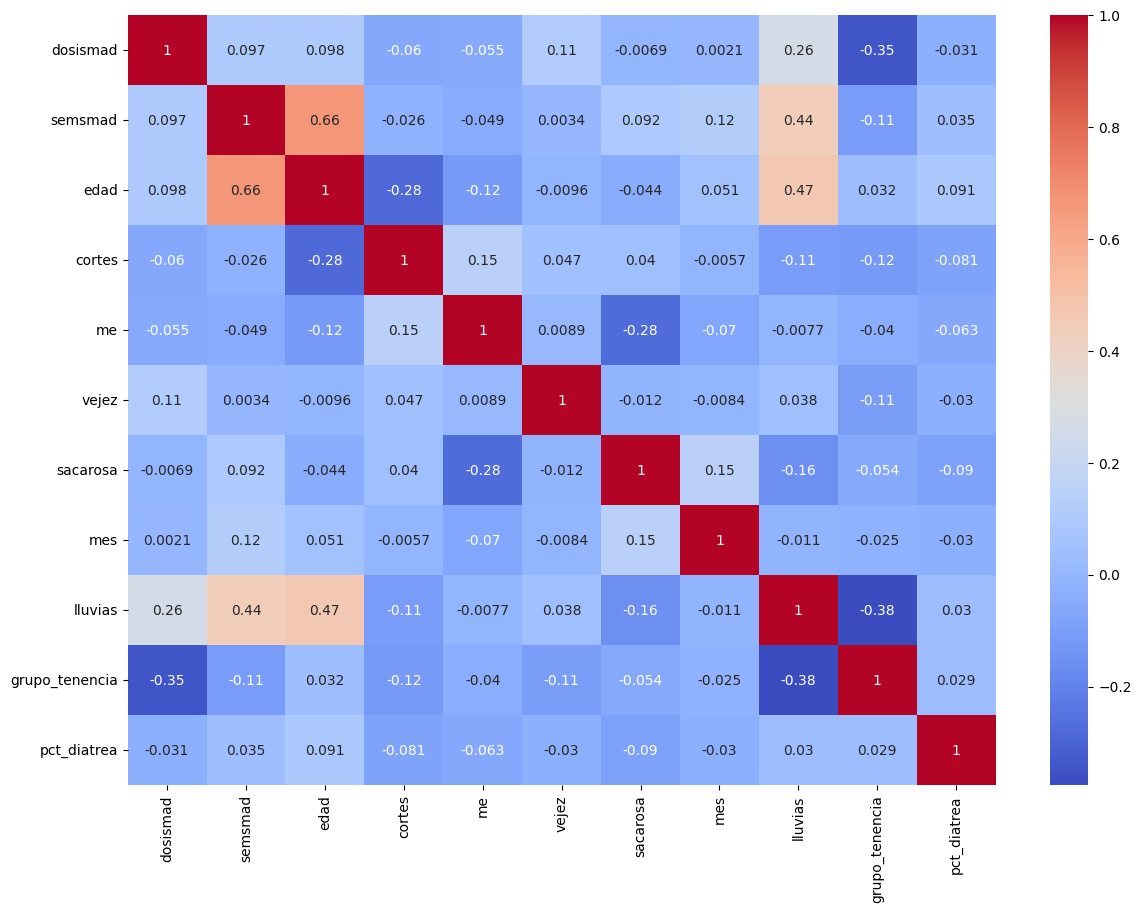

In [172]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_num_3.corr(), annot=True, cmap='coolwarm')
plt.show()

--- Sacamos una copia de nuestro dataset

In [173]:
df_num_3_sac = df_num_3.copy()

--- Vemos que la variable con mayor correlación es la variables mes con 27%.

In [174]:
# Calcular correlaciones con 'sacarosa'
corr_df_2 = df_num_3.corr()['sacarosa'].sort_values(ascending=False).reset_index()
corr_df_2.columns = ['Variable', 'Correlacion_con_Sacarosa']

print(corr_df_2.head(20))

          Variable  Correlacion_con_Sacarosa
0         sacarosa                  1.000000
1              mes                  0.147173
2          semsmad                  0.092324
3           cortes                  0.040351
4         dosismad                 -0.006872
5            vejez                 -0.011720
6             edad                 -0.043997
7   grupo_tenencia                 -0.053918
8      pct_diatrea                 -0.090487
9          lluvias                 -0.158616
10              me                 -0.278591


In [175]:
df_num_3_sac

dosismad  semsmad  edad  cortes    me  vejez  sacarosa  mes  lluvias  \
0          0.8      8.3  12.3       4  12.7    2.4      14.0   12      137   
1          0.8      6.3  11.2       2   7.8    2.3      13.0    3        0   
2          0.6      7.9  12.2       3   8.8    1.8      13.3    3       68   
3          0.8      6.6  13.1       1   6.1    2.5      13.4    3        0   
4          0.6      8.1  12.2       2   7.9    2.1      14.0    3       68   
...        ...      ...   ...     ...   ...    ...       ...  ...      ...   
2182       1.3      5.6  11.5       3   8.5    1.8      13.5    3       99   
2183       1.2      9.1  13.3       1   9.7    3.6      13.0   12      448   
2184       1.2      7.1  12.6       1   8.8    2.0      12.9    4      122   
2185       1.0      6.9  12.0       2   8.4    2.2      13.5    4       73   
2186       1.0      7.0  11.7       2   8.8    2.3      12.7    4      127   

      grupo_tenencia  pct_diatrea  
0                  3          6.2  
1                  3          3.5  
2                  3          4.3  
3                  3          3.5  
4                  3          4.3  
...              ...          ...  
2182               1          4.3  
2183               1          3.1  
2184               1          2.2  
2185               1          3.1  
2186               1          3.1  

[2187 rows x 11 columns]

-- Separo mi variable sacarosa entre niveles alto, medio y bajo conservando clases totalmente estables.

In [176]:
import pandas as pd

# Dividir en 3 grupos iguales (terciles)
df_num_3_sac['sacarosa_rango'] = pd.qcut(df_num_3_sac['sacarosa'], q=3, labels=['Bajo','Medio','Alto'])

print(df_num_3_sac['sacarosa_rango'])

0        Alto
1       Medio
2        Alto
3        Alto
4        Alto
        ...  
2182     Alto
2183    Medio
2184    Medio
2185     Alto
2186    Medio
Name: sacarosa_rango, Length: 2187, dtype: category
Categories (3, object): ['Bajo' < 'Medio' < 'Alto']


In [177]:
participacion = (
    df_num_3_sac.groupby('sacarosa_rango')
    .size()
    .reset_index(name='conteo')
)
participacion['porcentaje'] = (participacion['conteo'] / len(df_num_3_sac)) * 100

print(participacion)

  sacarosa_rango  conteo  porcentaje
0           Bajo     761   34.796525
1          Medio     710   32.464563
2           Alto     716   32.738912


/tmp/ipython-input-3802128799.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_num_3_sac.groupby('sacarosa_rango')


--- Los niveles de sacarosa bajo quedaron en rangos entre 9.2 y 12.4. Los del rango medio están entre 12.5 y 13.1 y los de rango alto están entre 13.2 y 16.0

In [178]:
resumen_sacarosa = (
    df_num_3_sac
    .groupby('sacarosa_rango')['sacarosa']
    .agg(['mean', 'min', 'max', 'count'])
    .reset_index()
)

print(resumen_sacarosa)

  sacarosa_rango       mean   min   max  count
0           Bajo  11.883706   9.2  12.4    761
1          Medio  12.801268  12.5  13.1    710
2           Alto  13.704609  13.2  16.0    716


/tmp/ipython-input-1587522773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('sacarosa_rango')['sacarosa']


In [179]:
df_num_3_sac = df_num_3_sac.drop(['sacarosa'], axis=1)

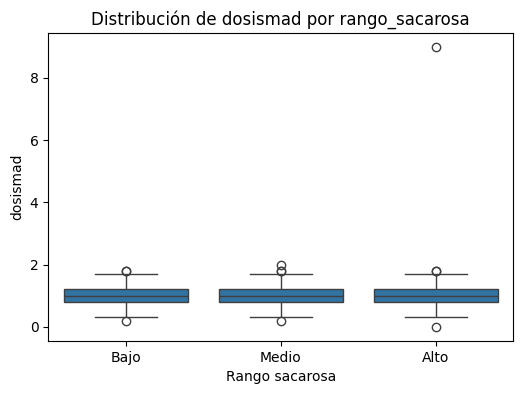

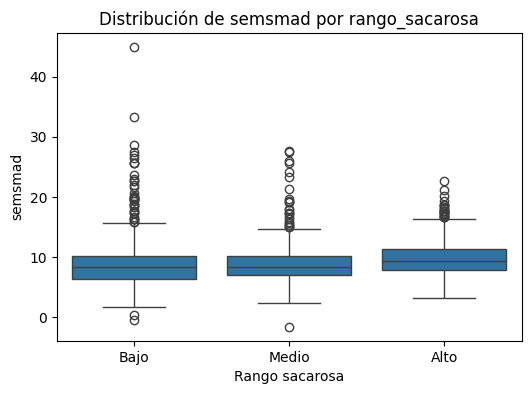

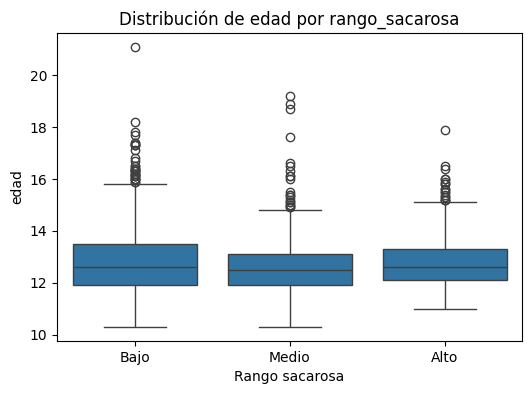

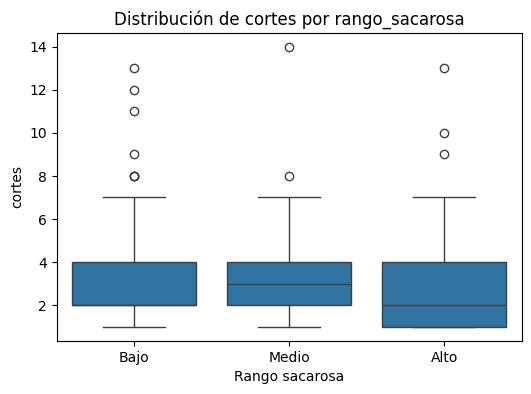

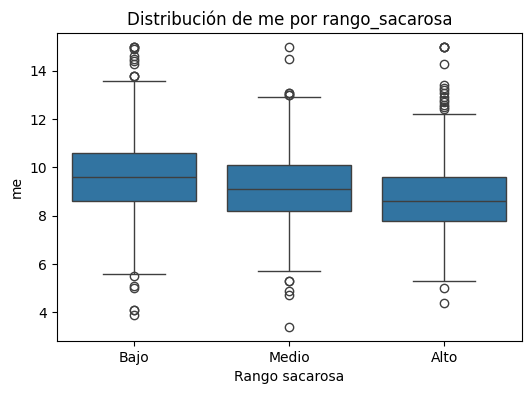

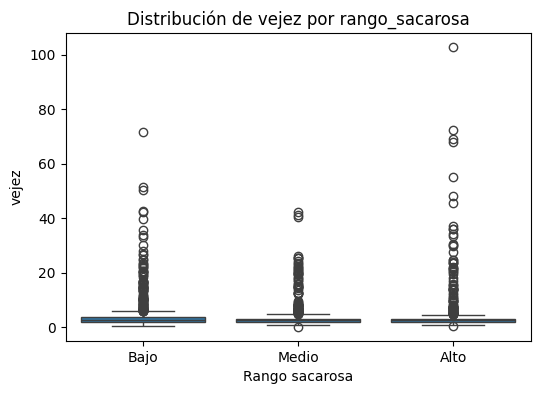

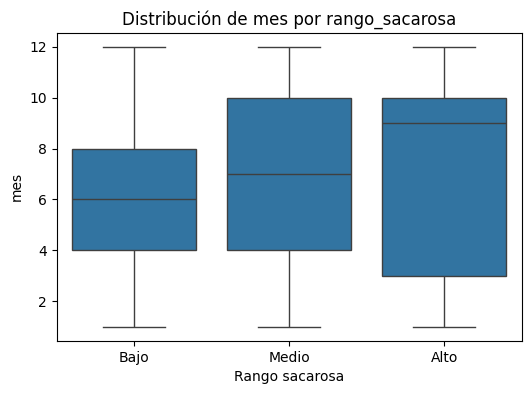

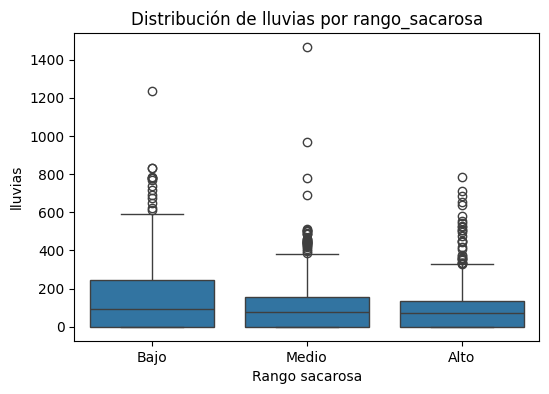

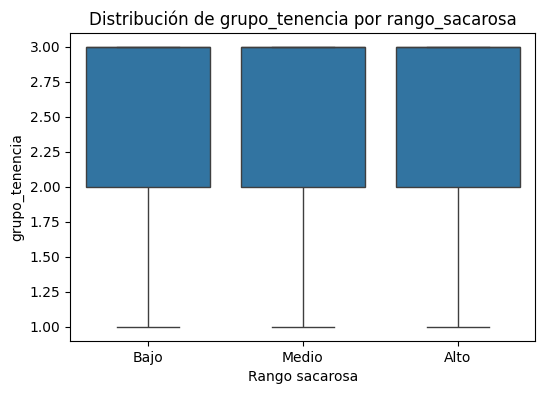

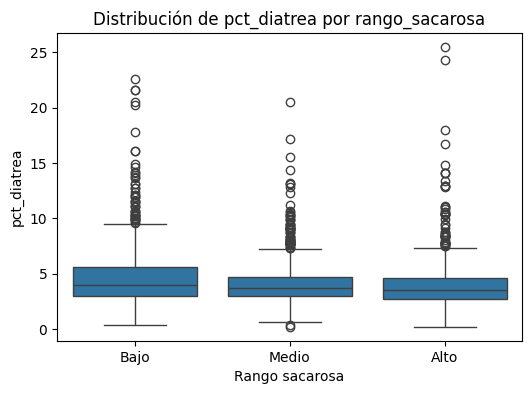

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

num_vars = df_num_3_sac.select_dtypes(include=['int64','float64']).columns
num_vars = [col for col in num_vars if col != 'sacarosa_rango']

for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='sacarosa_rango', y=var, data=df_num_3_sac)
    plt.title(f"Distribución de {var} por rango_sacarosa")
    plt.xlabel("Rango sacarosa")
    plt.ylabel(var)
    plt.show()

In [181]:
resumen = df_num_3_sac.groupby('sacarosa_rango')[num_vars].mean()
print(resumen)

                dosismad   semsmad       edad    cortes        me     vejez  \
sacarosa_rango                                                                
Bajo            1.001971  8.895664  12.845204  2.741130  9.635874  4.409198   
Medio           0.984789  8.886056  12.665211  2.815493  9.182958  3.772817   
Alto            0.992458  9.727374  12.782123  2.829609  8.746788  4.316201   

                     mes     lluvias  grupo_tenencia  pct_diatrea  
sacarosa_rango                                                     
Bajo            6.336399  146.586071        2.463863     4.621813  
Medio           6.611268  108.190141        2.445070     4.185775  
Alto            7.353352   97.501397        2.395251     4.124022  


/tmp/ipython-input-1830947601.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df_num_3_sac.groupby('sacarosa_rango')[num_vars].mean()


--- Como para TCH, con este heatmap vemos que la variable con mayor variación en la media por cada clase es lluvias.

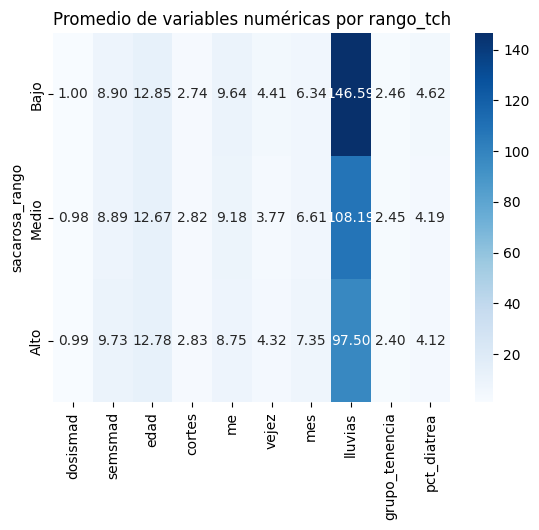

In [182]:
sns.heatmap(resumen, annot=True, fmt=".2f", cmap="Blues")
plt.title("Promedio de variables numéricas por rango_tch")
plt.show()

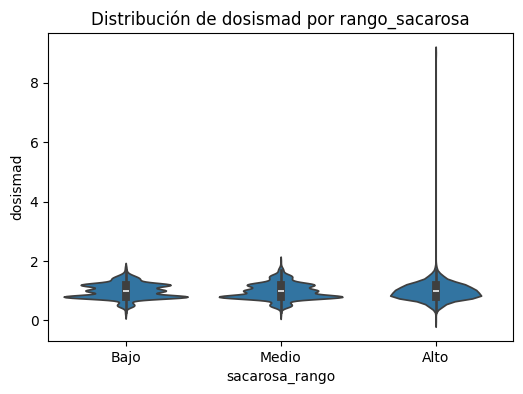

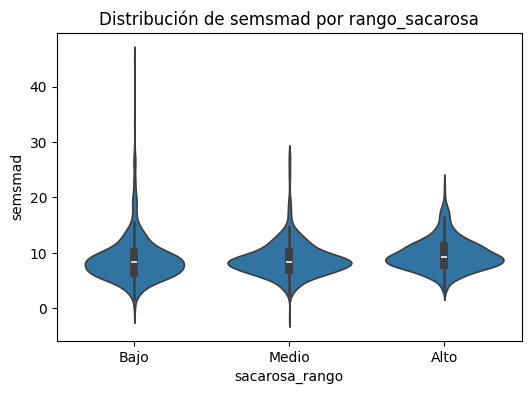

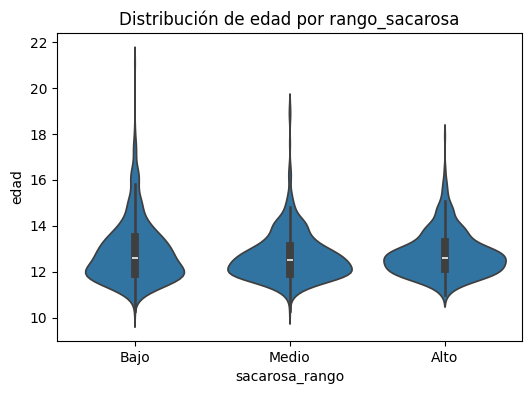

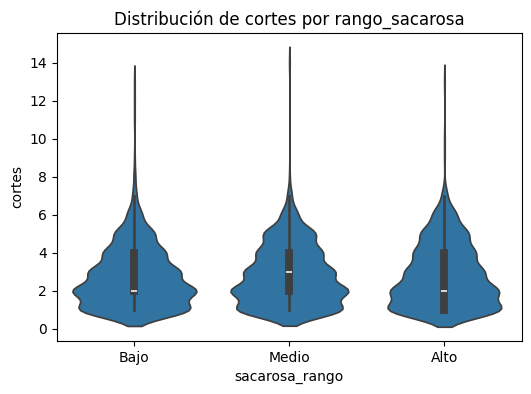

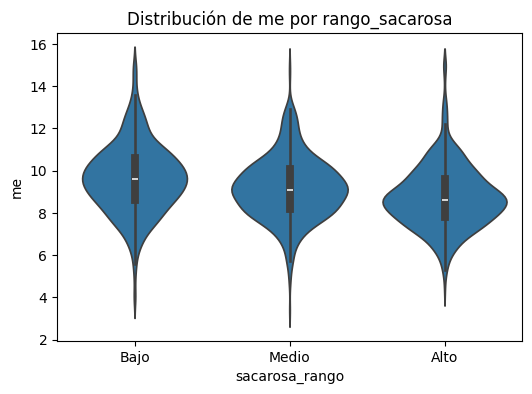

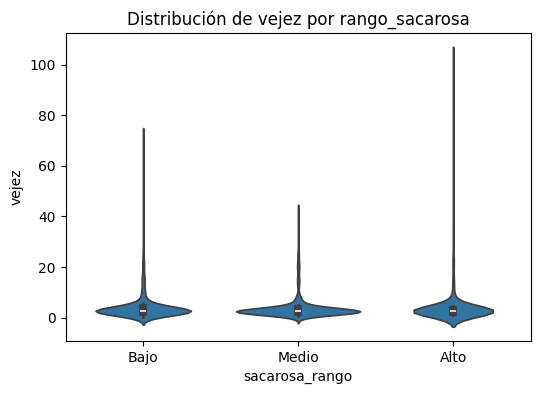

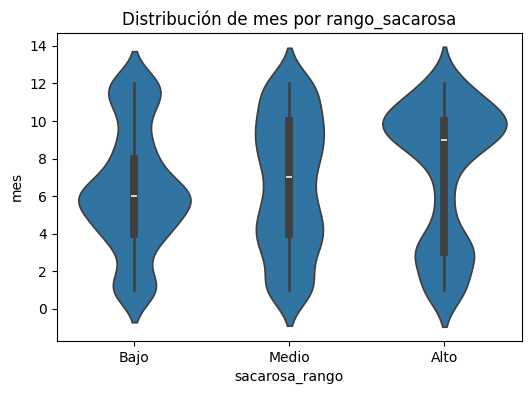

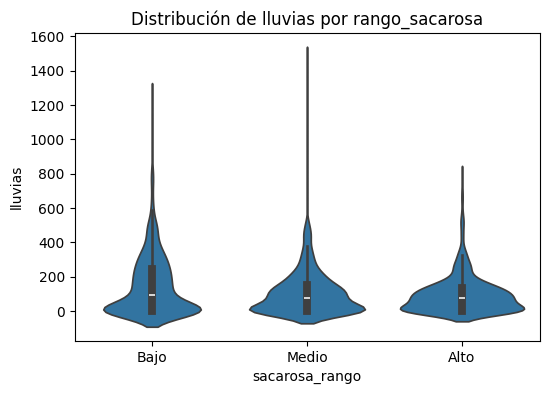

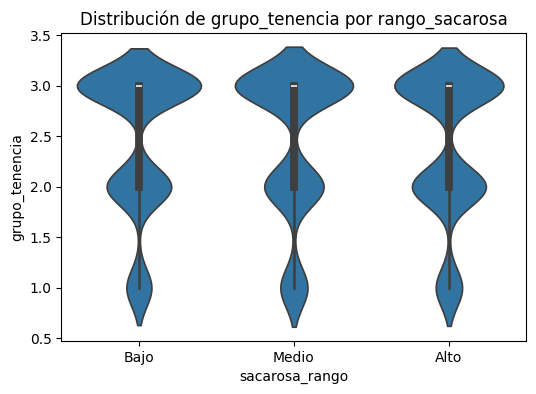

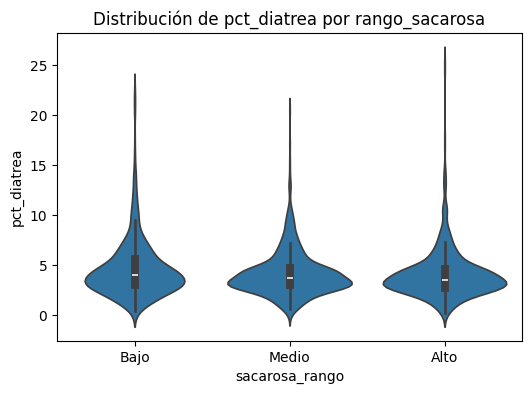

In [183]:
for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='sacarosa_rango', y=var, data=df_num_3_sac, inner='box')
    plt.title(f"Distribución de {var} por rango_sacarosa")
    plt.show()

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Variables (X = numéricas, y = categórica)
X = df_num_3_sac[['lluvias','cortes','grupo_tenencia','vejez','me']]
y = df_num_3_sac['sacarosa_rango']

# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo logístico (multinomial)
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)

# Reporte de métricas
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Coeficientes
print("Coeficientes por clase:\n", log_reg.coef_)
print("Interceptos:\n", log_reg.intercept_)

Reporte de clasificación:
               precision    recall  f1-score   support

        Alto       0.43      0.59      0.50       215
        Bajo       0.50      0.60      0.55       229
       Medio       0.32      0.14      0.19       213

    accuracy                           0.45       657
   macro avg       0.42      0.44      0.41       657
weighted avg       0.42      0.45      0.42       657

Coeficientes por clase:
 [[-0.24657356  0.05300058 -0.14302846  0.04094544 -0.31930272]
 [ 0.27509082 -0.03505399  0.12302047  0.03859719  0.30042646]
 [-0.02851727 -0.01794658  0.02000799 -0.07954263  0.01887626]]
Interceptos:
 [-0.04602449  0.03074383  0.01528066]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# ***Conclusiones***

Este modelo solo acierta el 45% de las veces que evalúa. Considerando que tenemos 3 clases, este modelo al igual que el de TCH es apenas mejor que evaluar al azar. El recall más alto es el de la clase baja con 60% y muy cercano al recall de la clase alta que es de 59% lo que indica que el modelo acierta para la clase alta en un 59% de las veces mientas que para la clase baja en un 60% de las veces. Por el contrario, al modelo se le dificulta predecir la clase medio con un recall del 14%. La precisión nos confirma el bajo rendimiento del modelo donde las evaluaciones generales, teniendo en cuenta las tres clases, nos muestran aciertos entre el 30% y el 50%.

Finalmente, el coeficiente que pesa en mayor medida en mi modelo viene dado por la variable me, que se interpreta como, con una unidad adicional de ME, esa unidad tiene un 32% de posibilidad de no pertenecer a esa clase.

Accuracy: 0.4459665144596651

Reporte de clasificación:
               precision    recall  f1-score   support

        Alto       0.43      0.59      0.50       215
        Bajo       0.50      0.60      0.55       229
       Medio       0.32      0.14      0.19       213

    accuracy                           0.45       657
   macro avg       0.42      0.44      0.41       657
weighted avg       0.42      0.45      0.42       657



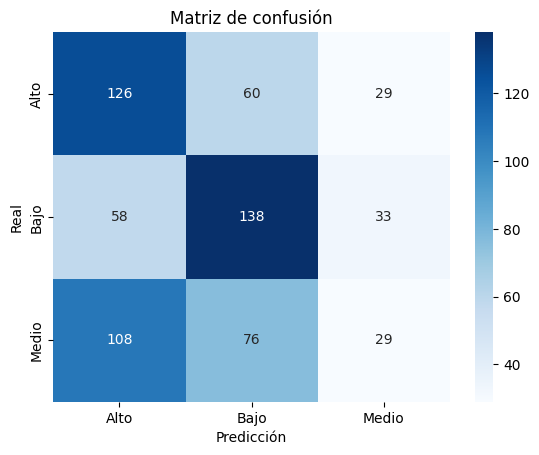

Log-Loss: 15.8332151098108


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [185]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte detallado
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

# Log-Loss
y_pred_proba = log_reg.predict_proba(X_test)
print("Log-Loss:", log_loss(y_test, y_pred_proba))

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Variables
X = df_num_3_sac[['lluvias','cortes','grupo_tenencia','vejez','me']]
y = df_num_3_sac['sacarosa_rango']

# Modelo con Ridge (L2)
log_reg_ridge = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    C=1.0,
    max_iter=1000
)

log_reg_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = log_reg_ridge.predict(X_test_scaled)

print("Reporte de clasificación (Ridge - L2):\n", classification_report(y_test, y_pred_ridge))

# Modelo con Lasso (L1)
log_reg_lasso = LogisticRegression(
    penalty='l1',
    solver='saga',
    multi_class='multinomial',
    C=1.0,
    max_iter=2000
)

log_reg_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = log_reg_lasso.predict(X_test_scaled)

print("Reporte de clasificación (Lasso - L1):\n", classification_report(y_test, y_pred_lasso))

Reporte de clasificación (Ridge - L2):
               precision    recall  f1-score   support

        Alto       0.43      0.59      0.50       215
        Bajo       0.50      0.60      0.55       229
       Medio       0.32      0.14      0.19       213

    accuracy                           0.45       657
   macro avg       0.42      0.44      0.41       657
weighted avg       0.42      0.45      0.42       657

Reporte de clasificación (Lasso - L1):
               precision    recall  f1-score   support

        Alto       0.43      0.59      0.50       215
        Bajo       0.50      0.60      0.55       229
       Medio       0.32      0.14      0.19       213

    accuracy                           0.45       657
   macro avg       0.42      0.44      0.41       657
weighted avg       0.42      0.45      0.42       657



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Los resultados utilizando técnicas de regularización no generan cambios significativos en los resultados del modelo.